# ***ĐỒ ÁN NHẬP MÔN KHOA HỌC DỮ LIỆU***
### **LỚP: 22KDL**
### **NHÓM: 22**
### **TÊN ĐỀ TÀI:  Yếu Tố Sân Nhà Có Ảnh Hưởng Đến Hiệu Số Tỉ Số Của Đội Bóng Không ?**
### **THÀNH VIÊN**
Tên  | MSSV | Công việc phân công | Mức độ hoàn thành
-------------------|------------------|-------------------|------------------|
Nguyễn Hồng Sơn      | 22280078 | Sử dụng LLM để trích xuất dữ liệu có cấu trúc | 100%
Trần Chí Hữu     | 22280038 | Cào dữ liệu thô từ web | 100%
Võ Minh Thịnh   | 22280087 | Dùng Causal Inference để kiểm định giả thuyết | 100%
Nguyễn Phạm Anh Văn | 22280104 | Dùng Causal Inference để kiểm định giả thuyết | 100%

### **NHÓM TRƯỞNG**
Tên  | MSSV |
-------------------|------------------|
Nguyễn Hồng Sơn      | 22280078

# **Giới thiệu về đề tài**

## Đặt vấn đề



Trước các trận thi đấu người ta luôn nói về vấn đề được thi đấu trên sân nhà là 1 lợi thế và tính đến trước tháng 06/2021 thì các trận đấu tại giải đấu có thể thức knock out vẫn có luật bàn thắng trên sân khách nếu 2 đội hòa sau 2 lượt trận. Vậy yếu tố sân thi đấu (sân nhà , sân khách) ảnh hưởng như thế nào đến kết quả ( thắng, thua, hòa) và tỉ số của trận đấu của 1 đội bóng ? Đồ án này của nhóm em sẽ trả lời câu hỏi trên.


## Giả thuyết đặt ra

Giả thuyết :
* **H0:** *Yếu tố "được đấu trên sân nhà" không ảnh hưởng đến hiệu số bàn thắng của đội bóng trong 1 trận đấu.*
* **H1:** *Yếu tố "được đấu trên sân nhà" sẽ có ảnh hưởng tích cực đến hiệu số bàn thắng của đội bóng trong 1 trận đấu.*

## Các bước thực hiện

Các bước thực hiện sẽ gồm:

  1. **Cào thông tin (dữ liệu thô) về các trận đấu của các đội bóng từ web.**
  2. **Sử dụng LLM để trích xuất dữ liệu có cấu trúc từ dữ liệu thô cào được.**
  3. **Sử dụng Causal Inference để kiểm tra giả thuyết**

#**1. Cào dữ liệu từ web**

## 1.1 Công cụ thực hiện

- **SELENIUM**
  + Selenium với Python là một bộ công cụ và thư viện cho phép bạn tự động hóa trình duyệt web bằng ngôn ngữ lập trình Python.
  + Bằng cách sử dụng Selenium với Python, bạn có thể viết các kịch bản tự động hóa để thực hiện các tác vụ như điều khiển trình duyệt web, tương tác với các phần tử trên trang web, nhập liệu, click chuột như cách mà user thao tác với trang web.
  + Vì dữ liệu mà đồ án này thực hiện cần lấy dữ liệu từ 2 trang là matchday overviews và matchday reports một cách tuần tự qua lại và liên tục nên selenium là công cụ hỗ trợ hiệu quả cung cấp các thao tác chuyển trang và trở lại trang trước. Ngoài ra trang web này cũng chứa nhiều text javascript làm ẩn các thông tin trên source html, mà selenium có hỗ trợ javascript do có thể mô phỏng các hành vi người dùng.
  + Đổi lại điểm yếu của selenium là tốc độ chạy chậm do phải thao tác trực tiếp với trình duyệt như user, và tốn nhiều tài nguyên hệ thống.
- **CÁCH SỬ DỤNG SELENIUM**
  + Để sử dụng selenium, cần cài đặt selenium bằng python như sau: Mở Command Prompt nhập "pip install selenium".
  + Lúc trước để sử dụng selenium cần cài đặt thêm webdriver(trình điều khiển web) tương ứng với trình duyệt sử dụng nhưng hiện tại thì không cần nữa. Ví dụ muốn sử dụng selenium chỉ cần import webdriver và chạy lệnh webdriver.Chrome() là đã tạo được trình điều khiển cho trình duyệt Chrome.

## 1.2 Website lấy dữ liệu

- Trang chủ website: https://www.transfermarkt.com
- Đường dẫn đến trang full matchday (matchday overviews) (Với quốc gia là France, giải đấu là Ligue 1): https://www.transfermarkt.com/ligue-1/spieltag/wettbewerb/FR1/saison_id/2023/spieltag/34
- Đường dẫn đến trang matchday report (trận đầu tiên trong Season: 23/24, Matchday: 1.Matchday): https://www.transfermarkt.com/spielbericht/index/spielbericht/4094582
- Dữ liệu sẽ được lấy từ 4 quốc gia là France, England, Germany, Spain, lấy dữ liệu tất cả trận đấu trong các matchday trong 5 năm gần nhất có dữ liệu trận đấu.

## 1.3 Thực hiện cào dữ liệu

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver import ActionChains
from selenium.webdriver.remote.webelement import WebElement
import argparse
import time
import os
import json

In [ ]:
WAIT_TIME = 5
MAX_ERROR_TIMES = 5 # Số lần thử lại khi duyệt web, tìm phần tử trong trang bị lỗi

# Options thêm vào driver để duyệt web không load hình ảnh
DEFAULT_CHROME_OPTIONS = webdriver.ChromeOptions()
PREFS = {"profile.managed_default_content_settings.images": 2}
DEFAULT_CHROME_OPTIONS.add_experimental_option("prefs", PREFS)

# Link trang chủ của website
HOME_PAGE = 'https://www.transfermarkt.com'

# Thành phần tạo link đến trang Full matchday của matchday and table có dạng "https://www.transfermarkt.com/{mã giải đấu}/spieltag/wettbewerb/{id quốc gia}/saison_id"
MID_URL = 'spieltag/wettbewerb'
LAST_URL = 'saison_id'

# Đường dẫn css, tên id của một số thành phần trong trang
TransfermarktWeb = {
    'id_popup_accept': 'sp_message_iframe_953358',
    'css_button_accept': 'button[title="Accept & continue"]',
    'css_quick_select_bar': 'tm-quick-select-bar.hydrated',
    'css_quick_select_in_shadow_root': 'tm-quick-select.hydrated',
    'css_list_tm_quick_select_item': 'div.selector-dropdown > ul > tm-quick-select-item.hydrated',
    'css_forward_button': 'a.forward-button',
    'css_button_show': 'tr > td > input[class="small button right"]',
    'css_sub_navigation': '',
    'css_box_table_select': 'table.auflistung > tbody > tr div.inline-select > div',
    'css_list_li_select': 'ul.chzn-results li',
    'css_matchday_overviews_boxs': 'div.box[style="border-top: 0 !important;"]',
    'css_matchday_infor_overview': 'table > tbody',
    'css_link_matchday_report': 'div.footer > a.liveLink',
    'css_lineup': 'main > div.row > div[class="large-12 columns"] > div.box > div.large-6',
    'css_lineup_name_team': 'a[class="sb-vereinslink"]',
    'css_starting_lineup': 'div.row div.aufstellung-unterueberschrift'
}

# Đóng pop-up hiện lên khi mở trang web lần đầu tiên
def accept_cookies(driver:webdriver):
    time.sleep(3)
    try:
        while len(driver.find_elements(By.ID, TransfermarktWeb['id_popup_accept'])) > 0:
            driver.switch_to.frame(TransfermarktWeb['id_popup_accept'])
            button_accept = driver.find_element(By.CSS_SELECTOR, TransfermarktWeb['css_button_accept'])
            button_accept.click()
            time.sleep(3)
            driver.switch_to.default_content()
    except:
        raise ValueError("Can't close pop-up iframe to accept cookies")

# Cuộn trang đến vị trí mà phần tử element nằm ở giữa trang
def scroll_page_to_element(driver:webdriver, element:WebElement):
    try:
        driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", element)
    except:
        raise ValueError('Scroll page to element error!')

In [ ]:
# Tìm phần tử thanh ngang chứa các ô chọn nhanh (quốc gia, giải đấu, clb, cầu thủ)
def find_tm_quick_select_bar(driver:webdriver):
        try:
            return driver.find_element(By.CSS_SELECTOR, TransfermarktWeb['css_quick_select_bar'])
        except:
            raise ValueError('Find tm quick select bar error!')

# Lấy danh sách các ô chọn nhanh
def get_list_select_boxs(driver:webdriver):
        tm_quick_select_bar = find_tm_quick_select_bar(driver)
        try:
            tm_quick_select_boxs = tm_quick_select_bar.shadow_root.find_elements(By.CSS_SELECTOR, TransfermarktWeb['css_quick_select_in_shadow_root'])
            return tm_quick_select_boxs
        except:
            raise ValueError('Get list select boxs error!')

# Lấy danh sách lựa chọn trong một ô chọn nhanh
def get_list_items_quick_select(contain_element):
    try:
        if contain_element.get_attribute('dropdown-visible') is None:
            contain_element.click()
        list_items = contain_element.find_elements(By.CSS_SELECTOR, TransfermarktWeb['css_list_tm_quick_select_item'])
        return list_items
    except:
        raise ValueError('Get list items error!')

# Chọn một lựa chọn trong ô chọn nhanh dựa trên nội dung văn bản bên trong lựa chọn
def select_item_quick_select_by_content(contain_element, content):
    list_items = get_list_items_quick_select(contain_element)
    try:
        if contain_element.get_attribute('dropdown-visible') is None:
            list_items.click()
        for item in list_items:
            if content == item.text:
                item.click()
                break
        return contain_element.find_element(By.CSS_SELECTOR, TransfermarktWeb['css_forward_button']).get_attribute('href')
    except:
        raise ValueError('Select item by content error!')

# Chọn lựa chọn đầu tiên trong ô chọn nhanh
def select_item_first(contain_element:WebElement):
    try:
        list_items = get_list_items_quick_select(contain_element)
        if contain_element.get_attribute('dropdown-visible') is None:
            list_items.click()
        list_items[0].click()
        return contain_element.find_element(By.CSS_SELECTOR, TransfermarktWeb['css_forward_button']).get_attribute('href')
    except:
        raise ValueError('Select first item get error!')

# Tạo đường dẫn đến trang full matchday sau khi lựa chọn quốc gia và giải đấu
def get_url_to_matchday_table(driver:webdriver, name_country:str, wait=WAIT_TIME, max_error_times=MAX_ERROR_TIMES):
    error_times = 0
    while error_times < max_error_times:
        try:
            quick_select_boxs = get_list_select_boxs(driver)
            select_item_quick_select_by_content(quick_select_boxs[0], name_country)
            driver.implicitly_wait(wait)
            url = select_item_first(quick_select_boxs[1])
            url = url.split('/')
            return "/".join([HOME_PAGE,url[3],MID_URL,url[6],LAST_URL])
        except:
            error_times += 1
            driver.refresh()
            driver.implicitly_wait(wait)
    raise ValueError('Get url to matchday table false!')

# Chuyển hướng đến trang full matchday
def to_matchday_table(driver, url, wait=WAIT_TIME):
    driver.get(url)
    driver.implicitly_wait(wait)

In [ ]:
# Tìm các ô chọn lọc (mùa giải, ngày thi đấu)
def get_filter_select_boxs(driver, max_error_times=MAX_ERROR_TIMES):
    error_times = 0
    while error_times < max_error_times:
        try:
            filter_select_boxs = driver.find_elements(By.CSS_SELECTOR, TransfermarktWeb['css_box_table_select'])
            return filter_select_boxs
        except:
            error_times += 1
            driver.refresh()

# Nhấn nút show để xác nhận lọc theo các lựa chọn
def submit_show(driver, wait=WAIT_TIME):
    try:
        driver.find_element(By.CSS_SELECTOR, TransfermarktWeb['css_button_show']).click()
        driver.implicitly_wait(wait)
    except:
        raise ValueError('Submit show error!')

# Lấy danh sách phần tử bên trong 1 ô chọn lọc
def get_list_items_filter_select(contain_element):
    try:
        if 'chzn-with-drop' not in contain_element.get_attribute('class'):
            contain_element.click()
        list_items = contain_element.find_elements(By.CSS_SELECTOR, TransfermarktWeb['css_list_li_select'])
        return list_items
    except:
        raise ValueError('Get list items error!')

# Chọn lựa chọn trong ô chọn lọc dựa trên nội dung văn bản bên trong
def select_item_filter_select_by_content(contain_element, content):
    list_items = get_list_items_filter_select(contain_element)
    try:
        if 'chzn-with-drop' not in contain_element.get_attribute('class'):
            contain_element.click()
        for item in list_items:
            if content == item.text:
                item.click()
                return
        contain_element.click()
    except:
        raise ValueError('Select item by content error!')

# Lấy danh sách các khung chứa thông tin tổng quan của 1 trận đấu trong 1 matchday
def get_list_overviews_boxs(driver, wait=WAIT_TIME, max_error_times=MAX_ERROR_TIMES):
    error_times = 0
    while error_times < max_error_times:
        try:
            list_overviews_boxs = driver.find_elements(By.CSS_SELECTOR, TransfermarktWeb['css_matchday_overviews_boxs'])
            return list_overviews_boxs
        except:
            error_times += 1
            driver.refresh()
            driver.implicitly_wait(wait)
    raise ValueError('Get overviews boxs error!')

# Lấy danh sách các đường dẫn đến match report của 1 trận đấu trong 1 matchday
def get_urls_to_match_report(list_overviews_boxs):
    try:
        list_url = []
        for box in list_overviews_boxs:
            url = box.find_element(By.CSS_SELECTOR, TransfermarktWeb['css_link_matchday_report']).get_attribute('href')
            list_url.append(url)
        return list_url
    except:
        raise ValueError('Get url to match report error!')

# Danh sách thông tin tổng quan của 1 trận đấu (vị trí đội trên bảng xếp hạng, tên đội, tỉ số, khán giả, trọng tài, ...) trong 1 matchday
def get_overviews_in_matchday(list_overviews_boxs):
    try:
        overviews = []
        for ovb in list_overviews_boxs:
            content_element = ovb.find_element(By.CSS_SELECTOR, TransfermarktWeb['css_matchday_infor_overview']).text
            overviews.append(content_element)
        return overviews
    except:
        raise ValueError('Get infor matchday error!')

# Lấy danh sách thông tin về line-ups của mỗi đội trong 1 trận đấu trong 1 matchday
def get_lineups_in_matchday(driver, list_urls, wait=WAIT_TIME, max_error_times=MAX_ERROR_TIMES):
    error_time = 0
    while error_time < max_error_times:
        try:
            lineup_infors = []
            for url in list_urls:
                driver.get(url)
                lineup_element = driver.find_elements(By.CSS_SELECTOR, TransfermarktWeb['css_lineup'])
                for lue in lineup_element:
                    lineup = ''
                    try:
                        lineup += lue.find_element(By.CSS_SELECTOR, TransfermarktWeb['css_lineup_name_team']).text
                    except:
                        lineup += 'None'
                    lineup += '\n'
                    try:
                        lineup += lue.find_element(By.CSS_SELECTOR, TransfermarktWeb['css_starting_lineup']).text
                    except:
                        lineup += 'None'
                    lineup += '\n'
                    lineup_infors.append(lineup)
                driver.back()
                driver.implicitly_wait(wait)
            return lineup_infors
        except:
            error_time += 1
            driver.refresh()
            driver.implicitly_wait(wait)
            return ['None/nNone/n', 'None/nNone/n']
            # raise ValueError('Get lineup infor error!')

# Danh sách thông tin của 1 trận đấu (thông tin tổng quan + line-ups) trong 1 matchday
def get_matchday_infor(driver):
    try:
        list_overviews_boxs = get_list_overviews_boxs(driver)
        overviews_content = get_overviews_in_matchday(list_overviews_boxs)
        list_urls = get_urls_to_match_report(list_overviews_boxs)
        lineup_infors = get_lineups_in_matchday(driver, list_urls)
        result = []
        for i in range(len(overviews_content)):
            result.append(overviews_content[i] + lineup_infors[2*i] + lineup_infors[2*i + 1])
        return result
    except:
        raise ValueError('Get matchday infor error!')

# Ghi dữ liệu vào file json
def write_to_json(file_name, data):
    if os.path.exists(file_name):
        with open(file_name, 'r') as f:
            old_data = json.load(f)
    else:
        old_data = {}
    old_data.update(data)
    with open(file_name, 'w') as f:
        json.dump(old_data, f, indent=4)

In [ ]:
def show_season_select_by_content(driver, content, wait=WAIT_TIME):
    filter_select_boxs = get_filter_select_boxs(driver)
    scroll_page_to_element(driver, filter_select_boxs[0])
    select_item_filter_select_by_content(filter_select_boxs[0], content)
    submit_show(driver, wait)

def show_matchday_select_by_content(driver, content, wait=WAIT_TIME):
    filter_select_boxs = get_filter_select_boxs(driver)
    scroll_page_to_element(driver, filter_select_boxs[1])
    select_item_filter_select_by_content(filter_select_boxs[1], content)
    submit_show(driver, wait)

def get_seasons_select(driver):
    filter_select_boxs = get_filter_select_boxs(driver)
    scroll_page_to_element(driver, filter_select_boxs[0])
    season_filter_select_boxs = get_list_items_filter_select(filter_select_boxs[0])
    return [ss.text for ss in season_filter_select_boxs]

def get_matchdays_select(driver):
    filter_select_boxs = get_filter_select_boxs(driver)
    scroll_page_to_element(driver, filter_select_boxs[1])
    matchday_filter_select_boxs = get_list_items_filter_select(filter_select_boxs[1])
    return [ms.text for ms in matchday_filter_select_boxs]

# Thực hiện cào dữ liệu với tên quốc gia country_name gồm nseasons mùa giải bỏ qua các seasons trong except_seasons, lưu dữ liệu cào được vào file_output có dạng json
def crawling(country_name, file_output, except_seasons=[], nseasons=5, wait=WAIT_TIME, max_error_times=MAX_ERROR_TIMES):
    driver = webdriver.Chrome(options=DEFAULT_CHROME_OPTIONS)
    driver.get(HOME_PAGE)
    accept_cookies(driver)
    url = get_url_to_matchday_table(driver, country_name, wait, max_error_times)
    to_matchday_table(driver, url, wait)
    seasons = get_seasons_select(driver)
    i = 0
    for ss in seasons:
        if i == nseasons:
            break
        if ss in except_seasons:
            continue
        i += 1
        show_season_select_by_content(driver, ss, wait)
        matchdays = get_matchdays_select(driver)
        for ms in matchdays:
            show_matchday_select_by_content(driver, ms, wait)
            matchday_infor = get_matchday_infor(driver)
            new_data = {}
            for ind, mi in enumerate(matchday_infor):
                new_data.update({f'{seasons[i]}-{ms}-{ind}': mi})
            write_to_json(file_output, new_data)
            print(f'{ss}-{ms}: Done')
    driver.quit()


In [ ]:
crawling('France', 'france.json', ['24/25', '2024'], 5)

In [ ]:
crawling('England', 'england.json', ['24/25', '2024'], 5)

In [ ]:
crawling('Germany', 'germany.json', ['24/25', '2024'], 5)

In [ ]:
crawling('Spain', 'spain.json', ['24/25', '2024'], 5)

# **2. Sử dụng LLM để trích dữ liệu có cấu trúc từ dữ liệu thô cào được.**

In [ ]:
# Một số thư viện cần thiết
import numpy as np
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from typing import Optional,Dict, TypedDict
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_community.llms import Anyscale
from langchain_core.prompts import PromptTemplate,ChatPromptTemplate, MessagesPlaceholder
from langchain.chains import LLMChain
from langchain_core.output_parsers import PydanticOutputParser
from langchain_core.messages import (
    AIMessage,
    HumanMessage,
    SystemMessage,
)
import os
import json
import pandas as pd


In [ ]:
ANYSCALE_API_BASE = "https://api.endpoints.anyscale.com/v1"
ANYSCALE_API_KEY = "esecret_xc3dx8e1de7hhi626wah26syul"
ANYSCALE_MODEL_NAME = "mistralai/Mixtral-8x22B-Instruct-v0.1"

# Thiết lập các biến môi trường để sử dụng Anyscale
os.environ["ANYSCALE_API_BASE"] = ANYSCALE_API_BASE
os.environ["ANYSCALE_API_KEY"] = ANYSCALE_API_KEY

## 2.1 Một số khái niệm cần thiết.

1. Langchain
2. LLM
3. Message
4. Prompt template
5. Chain
6. Output Parsers

### 1. Langchain

* LangChain là một framework mã nguồn mở được xây dựng xung quanh các mô hình ngôn ngữ lơn (Large Language Model - LLM) cho phép các lập trình viên xây dựng các ứng dụng dựa trên đó.
* Chúng ta sẽ dử dụng Langchain để thực hiện công đoạn này của đồ án.

### 2. LLM

* LLM - Large Language Model hay mô hình ngôn ngữ lớn là một loại mô hình trí tuệ nhân tạo được huấn luyện trên lượng dữ liệu văn bản rất lớn để hiểu và tạo ra ngôn ngữ tự nhiên một cách chính xác và tự nhiên.
* Các mô hình này có khả năng thực hiện nhiều tác vụ liên quan đến ngôn ngữ như dịch thuật, tóm tắt văn bản, trả lời câu hỏi, viết bài và thậm chí là sáng tác văn học.
* Trong phần này chúng ta sẽ sử dụng nó để trích xuất dữ liệu theo cấu trúc.
* LLM nhận input là kiểu chuỗi (string) và trả ra output là kiểu chuỗi nhưng Langchain cho phép ta truyền vào đó kiểu message và nó sẽ format lại thành kiểu chuỗi rồi truyền cho model.
* Langchain không sở hữu bất kì một model nào mà dựa vào nhà cung cấp thứ 3 (the third-party) như ChatOpenAi hay HuggingFace,...
* Ở đây chúng ta sẽ sử dụng model bằng cách sử dụng API.

In [ ]:
# ví dụ về sử dụng model với Langchain
# ở đây chúng ta sẽ sử dụng mô hình Mixtral-8x22B-Instruct-v0.1 từ Anyscale
ANYSCALE_API_BASE = "https://api.endpoints.anyscale.com/v1"
ANYSCALE_API_KEY = "esecret_xc3dx8e1de7hhi626wah26syul"
ANYSCALE_MODEL_NAME = "mistralai/Mixtral-8x22B-Instruct-v0.1"

# Thiết lập các biến môi trường để sử dụng Anyscale
os.environ["ANYSCALE_API_BASE"] = ANYSCALE_API_BASE
os.environ["ANYSCALE_API_KEY"] = ANYSCALE_API_KEY

# Khởi tạo mô hình
llm = Anyscale(model_name=ANYSCALE_MODEL_NAME,temperature=0.5)

# Gửi câu hỏi cho mô hình
# invoke là giao diện chuẩn giúp gọi chain trên một input
# chain là gì thì chúng ta sẽ tìm hiểu ở phần sau
# tạm thời ta coi đây như gửi query cho mô hình
respond=llm.invoke("Tell me a funny joke.")
print(respond)

 What do you call a blind dinosaur? Doyouthinkhesaurus!


### 3. Message

* Như đã nói ở trên Langchain cho phép ta truyền kiểu message vào input của LLM, vậy message là gì ?
* Message là một kiểu dữ liệu hoạt động cùng với Chatmodel, mỗi một message mô tả một hội thoại.
* Một cách cơ bản, một message gồm 2 thành phần chính sau đây:
    * role: mô tả ai là người sở hữu message đó, Langchain có các class dành cho các role khác nhau.
        * HumanMessage: đại diện cho message của user.
        * AIMessage: đại diện cho message từ model.
        * SystemMessage: đại diện cho message từ hệ thống, được dùng để hướng dẫn model cách để trả lời user. Không phải tất cả model đều hỗ trợ loại này.
        * Còn vài role nữa nhưng chúng ta chỉ cần nhiêu đây là đủ.
    * content: mô tả nội dung của message. Có 2 kiểu của content là kiểu string (hầu hết mọi model sẽ sử dụng) và một danh sách dictionary.


### 4. Prompt template

* Prompt templates giúp ta chuyển từ input người dùng và parameter thành những hướng dẫn cho mô hình ngô ngữ.
* Nó có thể được sử dụng để hướng dẫn mô hình trả về respond, giúp mô hình hiểu được những khái niệm và trả về được output liên quan.
* Input của Prompt Templates là dictionary. Mỗi key là tên của biến trong mẫu prompt để ta điền vào.
* Đầu ra của Prompt Templates là PromptValue. PromptValue có thể truyền vào mô hình ngôn ngữ và có thể được cast thành string hoặc một danh sách (list) message.
* Lí do có PromptValue là để ta dễ dàng chuyển qua lại giữ string và message.
* Có 3 dạng Prompt Templates: String PromptTemplates, ChatPromptTemplates và MessagesPlaceholder.

String PromptTemplates thường được dùng để format một string đơn lẻ và thường được sử dụng cho các input đơn giản.

In [ ]:
# tạo template, ở đây biến topic sẽ được thay thế bằng giá trị "cats"
prompt_template = PromptTemplate.from_template("Tell me a joke about {topic}")

prompt =prompt_template.invoke({"topic": "cats"})

prompt

StringPromptValue(text='Tell me a joke about cats')

ChatPromptTemplates : những mẫu prompt này thường được dùng để format danh sách các message. Bản thân mẫu prompt này bao gồm những mẫu prompt khác.

In [ ]:
prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful {job}"),
    ("user", "Tell me a joke about {topic}")
])

prompt=prompt_template.invoke({"topic": "cats", "job": "assistant"})

print("Print as message:")
print(prompt)

print("Print as string:")
print(prompt.to_string())

Print as message:
messages=[SystemMessage(content='You are a helpful assistant'), HumanMessage(content='Tell me a joke about cats')]
Print as string:
System: You are a helpful assistant
Human: Tell me a joke about cats


MessagesPlaceholder: Mẫu prompt này cho phép ta đặt một danh sách các message tại một vị trí cố định. Điều này còn có thể giúp ích ta  nếu ta muốn truyền vào một danh sách các message thay vì string.

In [ ]:
prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant"),
    MessagesPlaceholder("msgs")
])

prompt_template.invoke({"msgs": [HumanMessage(content="hi!")]})

print(prompt.to_string())

System: You are a helpful assistant
Human: Tell me a joke about cats


In [ ]:
# một cách khác để dùng placeholder
prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant"),
    ("placeholder", "{msgs}")
])

prompt_template.invoke({"msgs": [HumanMessage(content="hi!")]})

print(prompt.to_string())


System: You are a helpful assistant
Human: Tell me a joke about cats


### 5. Chain

* Khi làm việc với mô hình ngôn ngữ, đôi khi có những nhiệm vụ phức tạp cần ta phải sử lí qua nhiều công đoạn.
* Input của mỗi công đoạn đó chính là phần đã xử lí hay output của công đoạn trước.
* Chuỗi những công đoạn đó được gọi là chain.
* Langchain hỗ trợ ta định nghĩa các chain và làm việc với nó một cách dễ dàng hơn.

Như đã nói ở trên mỗi một PromptValue sẽ được truyền vào cho mô hình ngôn ngữ như một input. Một cách thô sơ ta có thể làm như sau:

In [ ]:
llm=Anyscale(model_name=ANYSCALE_MODEL_NAME,temperature=0.5)

# tạo template
prompt_template = ChatPromptTemplate.from_messages([
    ("system",
      "You are a calculator."
      "You solve math problems the user asks you."),
    ("user", "{query}")
])

# tạo input
input=prompt_template.invoke({"query": "What is 2+2?"})

# gửi input cho mô hình và nhận câu trả lời
respond=llm.invoke(input)
print(respond)


Assistant: The sum of 2 and 2 is 4.


Có thể thấy với cách làm thông thường, chỉ với 2 công đoạn, đã khá rườm rà. Ta sẽ tối ưu về mặt hình thức hơn bằng các dùng tạo ra một chain để xử lí

In [ ]:
# chọn mô hình
llm=Anyscale(model_name=ANYSCALE_MODEL_NAME,temperature=0.5)

# tạo template
prompt_template = ChatPromptTemplate.from_messages([
    ("system",
      "You are a calculator."
      "You solve math problems the user asks you."),
    ("user", "{query}")
])

# định nghĩa chain
chain = prompt_template | llm
# Đoạn code trên đã giúp ta tạo ra một chain
# Khi ta truyền input vào chain, đầu tiên nó sẽ được đưa vào prompt_template để tạo ra một output là prompt
# Sau đó output đó sẽ được truyền vào mô hình llm để tạo ra một output là respond
# ta sử dụng dấu "|" để kết nối các bước trong chain
# và sẽ sữ dụng invoke để gọi chain trên một input
# trong ví dụ từ nãy đến giờ ta truyền input bằng invoke là vì ta xem một bước đơn lẻ đó chính là 1 chain

respond=chain.invoke({"query": "What is 2+2*8?"})
print(respond)


Assistant: The result is 18. According to the order of operations (PEMDAS/BODMAS), you should perform multiplication and division before addition and subtraction. So, 2 + (2*8) = 2 + 16 = 18.


chain : **prompt | llm** chính là chain căn bản nhất

### 6. Output parsers

* Có nhiệm vụ nhận output từ model ( kiểu message hoặc string ) sau đó chuyển nó thành một kiểu khác để sử dụng cho những công đoạn xử lí phía sau.
* Hữu dụng khi dùng để tạo dữ liệu có cấu trúc (structured data) bởi LLM hoặc để chuẩn hóa output từ mô hình ngôn ngữ.

* Langchain có rất nhiều loại output parsers khác nhau như JSON, CSV, Pydantic,... Nhưng ở đây chúng ta sẽ chọn sử dụng Pydantic output parsers vì nó khá dễ sử dụng.

* Cần lưu ý thêm một điều: hiện giờ ngày càng nhiều model đã hỗ trợ việc trả về output có cấu trúc mà không cần dùng  tới output parsers tuy nhiên không phải là tất cả, thế nên để mang tính tổng quát hơn chúng ta sẽ sử dụng output parsers.

Để sử dụng output parser, trước tiên ta cần tạo một schema tức tạo một cái khung chứa các thông tin cần trích xuất từ đối tượng mà ta mong muốn.

Schema sẽ được tạo bằng một lớp kế thừa lớp BaseModel trong gói pydantic_v1.

In [ ]:
# ta sẽ tạo một schema về đối tượng Person với các thông tin căn bản
# với mỗi thông tin (khải niệm) ta định nghĩa trong lớp Person
# ta phải mô tả, giải thích thông tin đó cho mô hình thông qua Field
# thậm chí là giải thích về lớp Person trong phần docstring
# việc mô tả này rất quan trọng vì nó sẽ được truyền vào prompt_template
# để hướng dẫn và giúp mô hình hiểu rõ hơn về thông tin cần xử lý và trích xuất
# mô tả càng tốt thì kết quả trích xuất càng chính xác

class Person(BaseModel):
    """Information about a person."""
    name: Optional[str] = Field(description="The person's name.")
    age: Optional[int] = Field(description="The person's age.")

In [ ]:
# tạo một parser với schema Person
parser = PydanticOutputParser(pydantic_object=Person)

# sử dụng method get_instuctions để xem yêu cầu về format của input
# yêu cầu đó sẽ được truyền vào prompt_template
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"description": "Information about a person.", "properties": {"name": {"title": "Name", "description": "The person's name.", "type": "string"}, "age": {"title": "Age", "description": "The person's age.", "type": "integer"}}}
```


In [ ]:
# giờ ta sẽ tạo prompt_template
prompt=ChatPromptTemplate.from_messages([
    (
        "system",
        "You are an expert extraction algorithm."
        "Only extract relevant information from the text. "
        "If you do not know the value of an attribute asked to extract, "
        "check it one more time and if you still can't find it, "
        "return null for the attribute's value."
        "Answer the user query,"
        " Wrap the output in ```json tag\n{format_instructions}"
    ),
    ("user", "{query}")
]).partial(format_instructions=parser.get_format_instructions())

# print prompt templates
print(prompt.invoke({"query": ""}).to_string())

System: You are an expert extraction algorithm.Only extract relevant information from the text. If you do not know the value of an attribute asked to extract, check it one more time and if you still can't find it, return null for the attribute's value.Answer the user query, Wrap the output in ```json tag
The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"description": "Information about a person.", "properties": {"name": {"title": "Name", "description": "The person's name.", "type": "string"}, "age": {"title": "Age", "description": "The person's age.", "type": "integer"}}}
```
Human: 


In [ ]:
llm=Anyscale(model_name=ANYSCALE_MODEL_NAME,temperature=0.5)

#tạo chain
chain=prompt|llm

# truyền query vào chain
parser_input=chain.invoke({"query": "Eight-year-old Alex is an energetic boy who loves playing soccer"})

# truyền output của chain vào parser
output=parser.parse(parser_input)
output

Person(name='Alex', age=8)

In [ ]:
# một cách dễ dàng hơn ta có thể thêm parser vào chain
chain=prompt|llm|parser
chain.invoke({"query": "John is 25 years old."})

Person(name='John', age=25)

## 2.2 Trích xuất dữ liệu có cấu trúc từ dữ liệu thô

Đầu tiên chúng ta sẽ xem dữ liệu mà chúng ta cào được và xem thử 1 input chúng ta sẽ truyền vào trong chain.

In [ ]:
file_names=['germany.json','france.json','spain.json','england.json']
raw_data = []
for file_name in file_names:
    with open(file_name) as f:
        # Load JSON data from file
        data = json.load(f)

    # Now data contains the data from the JSON file
    for i in data:
        raw_data.append(i.split('-')[1]+'\n'+data[i])

In [ ]:
print(raw_data[0])

1.Matchday
  (9.)  Werder Bremen 0:4 Bayern Munich  (3.)  
Friday, Aug 18, 2023  - 8:30 PM
  42.100 sold out  ·   Felix Zwayer
Course of play
    0:1 4'  Leroy Sané
    0:2 74'  Harry Kane
    0:3 90'  Leroy Sané
    0:4 90+4'  Mathys Tel
   Leroy Sané  - Score: 1.5
3.89 Average score 2.57
Who does the community think will win?
2.5 % 5.1 % 92.4 %
SV Werder Bremen
Starting Line-up: 3-1-4-2
Bayern Munich
Starting Line-up: 4-2-3-1



Mỗi phần tử của raw_data chính là thông tin của 1 trận đấu.

Mỗi trận đấu sẽ bao gồm cả đội khách và đội nhà.

Nhưng thứ chúng ta muốn trích xuất là thông tin trận đấu của từng đội.

Vậy nên ta sẽ làm như sau:

* Đầu tiên là ta trích xuất thông tin từng trận đấu (gồm cả 2 đội khách và nhà).
    
* Lưu trữ vào dataframe, thực hiện các bước preprocessing.

* Tách mỗi trận thành 2 trận của đội khách và đội nhà.

### 1. Trích xuất thông tin trận đấu từ dữ liệu thô

Tạo lớp Match với một số thuộc tính cần trích xuất như sau:

* matchday_order (int): Là thứ tự của matchday trong mùa (season)
* home_team (string): tên của đội nhà
* home_team_position (int): hạng rank của đội nhà trước khi bắt đầu trận đấu
* home_team_score (int): số bàn thắng của đội nhà trong trận đấu
* home_team_starting_lineup (string): đội hình ra trận của đội nhà
* away_team (string): tên của đội khách
* away_team_position (int): hạng rank của đội khách trước khi bắt đầu trận đấu
* away_team_score (int): số bàn thắng của đội khách trong trận đấu
* away_team_starting_lineup (string): đội hình ra trận của đội khách
* comunity_prediction_home_team_win (float): tỷ lệ dự đoán đội nhà thắng của cộng đồng
* comunity_prediction_away_team_win (float): tỷ lệ dự đoán đội khách thắng của cộng đồng
* comunity_prediction_draw (float): tỷ lệ dự đoán 2 đội hòa nhau
* date (string): ngày diễn ra trận đấu
* referee (string): tên vị trọng tài của trận đấu

*Có một chỗ cần lưu ý ở đây, đó là dữ liệu ta đưa vào không phải là một câu rõ ràng miêu tả rõ về các thuộc tính trên mà thay vào đó là các thông tin được sắp xếp theo dạng bảng mà chỉ những người có hiểu biết về lĩnh vực đó mới biết được thông tin nào nằm ở đâu. Chính vì thế, khi describe, ngoài giải thích thuộc tính đó là gì chúng ta sẽ giải thích thêm vị trí nào thuộc tính đó sẽ xuất hiện.*

VD: tên đội xuất hiện đầu tiên sẽ là tên đội nhà ,...


In [ ]:
# Tạo schema về Match
class Match(BaseModel):
    """Information about a match between Hometeam and Awayteam."""
    matchday_order: Optional[int] = Field(default=None, description="The order of the matchday in the season, the number occurs in the beginning of the line.")
    home_team: Optional[str] = Field(default=None, description="The name of the team that occurs first.")
    home_team_position: Optional[int] = Field(default=None, description="The number in the round bracket in front of the home team name and in the beginning of the line contains both home team name and away team name, show the position in rank of home team.")
    home_team_score: Optional[int] = Field(default=None, description="The number that occurs right after the home team name, show the score of home team.")
    away_team: Optional[str] = Field(default=None, description="The name of the team that occurs second.")
    away_team_position: Optional[int] = Field(default=None, description="The number in the round bracket in right after the away team and in the end of the line contains both home team name and away team name, show the position in rank of away team.")
    away_team_score: Optional[int] = Field(default=None, description="The number that occurs in front of the away team name, show the score of away team.")
    home_team_starting_lineup: Optional[str] = Field(default=None, description="The information of the home team line up , is the line up occurs first.ONLY include the numbers")
    away_team_starting_lineup: Optional[str] = Field(default=None, description="The information of the away team line up , is the line up occurs second.ONLY include the numbers")
    comunity_prediction_home_team_win: Optional[float] = Field(default=None, description="the first number in the comunity prediction, show the percentage of the home team win, usually goes with %%.")
    comunity_prediction_draw: Optional[float] = Field(default=None, description="the second number in the comunity prediction, show the percentage of the draw,  usually goes with %%.")
    comunity_prediction_away_team_win: Optional[float] = Field(default=None, description="the third number in the comunity prediction, show the percentage of the away team win, usually goes with %%.")
    date: Optional[str] = Field(default=None, description="The date of the match, the date occurs in the line bellow of home team name, NOT includes time.Convert to dd/mm/yyyy format.")
    referee: Optional[str] = Field(default=None, description="The name of the referee, the name occurs in the line bellow of the line containing date and time.")

Tạo output parser để trích xuất Match

In [ ]:
parser=PydanticOutputParser(pydantic_object=Match)

Tạo prompt template, phần này chúng ta cũng cần chú ý kĩ các hướng dẫn

In [ ]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an expert extraction algorithm in a football match. "
            "Only extract relevant information from the text."
            "Return null for the attribute's values you can't find."
            "Don't make up the information if you can't find it."
            "Answer the user query.NO NEED TO PRINT 'AI:' IN OUTPUT. Wrap the output in ```json tag\n{format_instructions}",
        ),

        # dùng placeholder để ta có thể truyền example vào cho model
        # việc có trước một số đoạn hội thoại làm mẫu
        # sẽ giúp cải thiện hiệu năng của mô hình
        # ví dụ như giúp xác định và trích xuất thông tin tốt hơn
        # giảm được lỗi format output khi truyền cho parser
        MessagesPlaceholder("example"),
        ("user", "{query}"),
    ]
).partial(format_instructions=parser.get_format_instructions())

Chọn mô hình, như đã nói ở trên ở đây chúng ta sẽ dùng model *Mixtral-8x22B-Instruct-v0.1* từ Anyscale, các bạn có thể sử dụng mô hình khác nhưng sẽ phải thay đổi nội dung *prompt templates* để cho phù hợp với mô hình của bạn sử dụng.

In [ ]:
llm=Anyscale(model_name=ANYSCALE_MODEL_NAME,temperature=0.0)

Tạo chain với thứ tự như sau : *prompt -> llm -> parser*

In [ ]:
chain=prompt | llm | parser

Tiếp đến ta sẽ tạo một số hàm cần thiết:
* Hàm tạo example
* Hàm để lưu các thuộc tính của một đối tượng Match vào dictionary để tạo dataframe

Hàm tạo example

In [ ]:
# tạo lớp Example để định nghĩa cấu trúc của một example
# một example sẽ chứa query và output
# query là input sẽ truyền vào
# output là chính là đối tượng Match đúng mà chain phải trả về
class Example(TypedDict):
    query: str
    output: Match

# hàm chuyển đổi một đối tượng Example thành các message để truyền vào prompt template
def convert_example_into_message(Example):
    query = Example["query"]
    output = Example["output"]
    matchday_order= "null" if output.matchday_order is None else output.matchday_order
    home_team= "null" if output.home_team is None else f' "{output.home_team}" '
    home_team_position= "null" if output.home_team_position is None else output.home_team_position
    home_team_score= "null" if output.home_team_score is None else output.home_team_score
    away_team= "null" if output.away_team is None else f' "{output.away_team}" '
    away_team_position= "null" if output.away_team_position is None else output.away_team_position
    away_team_score= "null" if output.away_team_score is None else output.away_team_score
    home_team_starting_lineup= "null" if output.home_team_starting_lineup is None else f' "{output.home_team_starting_lineup}" '
    away_team_starting_lineup= "null" if output.away_team_starting_lineup is None else f' "{output.away_team_starting_lineup}" '
    comunity_prediction_home_team_win= "null" if output.comunity_prediction_home_team_win is None else output.comunity_prediction_home_team_win
    comunity_prediction_draw= "null" if output.comunity_prediction_draw is None else output.comunity_prediction_draw
    comunity_prediction_away_team_win= "null" if output.comunity_prediction_away_team_win is None else output.comunity_prediction_away_team_win
    date= "null" if output.date is None else f' "{output.date}" '
    referee= "null" if output.referee is None else f' "{output.referee}" '
    ai_ouptut_=f"""
        "matchday_order": {matchday_order},
        "home_team": {home_team},
        "home_team_position": {home_team_position},
        "home_team_score": {home_team_score},
        "away_team": {away_team},
        "away_team_position": {away_team_position},
        "away_team_score": {away_team_score},
        "home_team_starting_lineup": {home_team_starting_lineup},
        "away_team_starting_lineup": {away_team_starting_lineup},
        "comunity_prediction_home_team_win": {comunity_prediction_home_team_win},
        "comunity_prediction_draw": {comunity_prediction_draw},
        "comunity_prediction_away_team_win": {comunity_prediction_away_team_win},
        "date": {date},
        "referee": {referee}
    """
    ai_ouptut="\n ```json\n{"+ai_ouptut_+"}\n```"
    return [("user", query), ("ai", ai_ouptut)]

Hàm lưu thông tin của đối tượng Match vào dictionary

In [ ]:
# kiểm tra xem đối tượng Match trả về có thiếu attribute nào không
# nếu có thì trả về False
def check_extracted_data_is_not_null(respond):
    if respond.matchday_order is None or respond.home_team is None or respond.home_team_position is None or respond.home_team_score is None or respond.away_team is None or respond.away_team_position is None or respond.away_team_score is None or respond.home_team_starting_lineup is None or respond.away_team_starting_lineup is None or respond.comunity_prediction_home_team_win is None or respond.comunity_prediction_draw is None or respond.comunity_prediction_away_team_win is None or respond.referee is None  or respond.date is None :
        return False
    return True

# hàm lưu thông tin từ respond vào Extracted_Data
# với respond là đối tượng Match trả về từ chain
def store_data_from_respond(Extracted_Data,respond):
    Extracted_Data["Matchday order"].append(respond.matchday_order)
    Extracted_Data["Home team"].append(respond.home_team)
    Extracted_Data["Home team position"].append(respond.home_team_position)
    Extracted_Data["Home team score"].append(respond.home_team_score)
    Extracted_Data["Away team"].append(respond.away_team)
    Extracted_Data["Away team position"].append(respond.away_team_position)
    Extracted_Data["Away team score"].append(respond.away_team_score)
    Extracted_Data["Home team starting lineup"].append(respond.home_team_starting_lineup)
    Extracted_Data["Away team starting lineup"].append(respond.away_team_starting_lineup)
    Extracted_Data["Comunity prediction home team win"].append(respond.comunity_prediction_home_team_win)
    Extracted_Data["Comunity prediction draw"].append(respond.comunity_prediction_draw)
    Extracted_Data["Comunity prediction away team win"].append(respond.comunity_prediction_away_team_win)
    Extracted_Data["Date"].append(respond.date)
    Extracted_Data["Referee"].append(respond.referee)

Tạo một bộ Example, ở đây ta sẽ cho 5 examples

In [ ]:
example_set=[
  Example(
    query="""
12.Matchday
(15.)  FC Augsburg 2:1 1.FSV Mainz 05  (18.)
Saturday, Sep 23, 2023  - 3:30 PM
 22.012 sold out  ·   Marco Fritz
Course of play
    0:1 6'  Ludovic Ajorque
Ermedin Demirovic  15' 1:1
Ermedin Demirovic  45' 2:1
Arne Engels  62'
   Ermedin Demirovic  - Score: 2.1
3.48 Average score 3.87
Who does the community think will win?
47.2 % 40.1 % 12.6 %
FC Augsburg
Starting Line-up: 3-4-2-1
1.FSV Mainz 05
Starting Line-up: 3-4-2-1
""",
    output=Match(matchday_order=12, home_team='FC Augsburg', home_team_position=15, home_team_score=2, away_team='1.FSV Mainz 05', away_team_position=18, away_team_score=1, home_team_starting_lineup='3-4-2-1', away_team_starting_lineup='3-4-2-1', comunity_prediction_home_team_win=47.2, comunity_prediction_draw=40.1, comunity_prediction_away_team_win=12.6, date='23/09/2023', referee='Marco Fritz')
),
Example(
    query="""
1.Matchday
(17.)  Arm. Bielefeld 2:1 1.FSV Mainz 05  (16.)
Saturday, Dec 5, 2020  - 3:30 PM
 Marco Fritz
Course of play
Manuel Prietl  21' 1:0
Ritsu Doan  31' 2:0
    2:1 82'  Kevin Stöger
   Ritsu Doan  - Score: 1.8
2.98 Average score 3.72
Who does the community think will win?
34.2 % 35.3 % 30.5 %
Arminia Bielefeld
Starting Line-up: 4-4-2 double 6
1.FSV Mainz 05
Starting Line-up: 3-4-2-1
""",
output=Match(matchday_order=1,home_team='Arminia Bielefeld', home_team_position=17, home_team_score=2, away_team='1.FSV Mainz 05', away_team_position=16, away_team_score=1, home_team_starting_lineup='4-4-2 double 6', away_team_starting_lineup='3-4-2-1', comunity_prediction_home_team_win=34.2, comunity_prediction_draw=35.3, comunity_prediction_away_team_win=30.5, date='05/12/2020', referee='Marco Fritz')
),
Example(
    query="""21.Matchday
  (13.)  Bor. M'gladbach 0:0 Darmstadt 98  (18.)
Saturday, Feb 10, 2024  - 3:30 PM
  46.121  ·
   Marcel Schuhen  - Score: 2.2
3.61 Average score 3.38
Who does the community think will win?
94.8 % 3.4 % 1.8 %
Borussia Mönchengladbach
Starting Line-up: 3-5-2 flat
SV Darmstadt 98
Starting Line-up: 3-4-1-2""",
    output=Match(matchday_order=21, home_team='Borussia Mönchengladbach', home_team_position=13, home_team_score=0, away_team='Darmstadt 98', away_team_position=18, away_team_score=0, home_team_starting_lineup='3-5-2 flat', away_team_starting_lineup='3-4-1-2', comunity_prediction_home_team_win=94.8, comunity_prediction_draw=3.4, comunity_prediction_away_team_win=1.8, date='10/02/2024', referee=None)
  ),
Example(
    query="""29.Matchday
(4.)  Stade Rennais 6:1 FC Metz  (19.)
Sunday, Mar 20, 2022  - 3:00 PM
  27.966  ·   Willy Delajod
Course of play
Martin Terrier  18' 1:0
Martin Terrier  27' 2:0
Serhou Guirassy  40' 3:0
Serhou Guirassy  54' 4:0
Hamari Traoré  58' 5:0
Serhou Guirassy  64' 6:0
    6:1 87'  Louis Mafouta
Who does the community think will win?
96.3 % 3.7 % 0.0 %
Stade Rennais FC
Starting Line-up: 4-3-3 Attacking
FC Metz
Starting Line-up: 3-4-3 """,
    output=Match(matchday_order=29, home_team='Stade Rennais', home_team_position=4, home_team_score=6, away_team='FC Metz', away_team_position=19, away_team_score=1, home_team_starting_lineup='4-3-3 Attacking', away_team_starting_lineup='3-4-3', comunity_prediction_home_team_win=96.3, comunity_prediction_draw=3.7, comunity_prediction_away_team_win=0.0, date='20/03/2022', referee='Willy Delajod')
  ),
Example(
    query=""" 31.Matchday
  (10.)  FC Schalke 04 postponed B. Leverkusen  (5.)
Sunday, Jun 14, 2020  - 6:00 PM
 Daniel Siebert
Course of play
Daniel Caligiuri  51' 1:0
    1:1 81'  Juan Miranda
   Sven Bender  - Score: 2.6
3.53 Average score 3.64
Who does the community think will win?
6.3 % 7.3 % 86.4 %
FC Schalke 04
Starting Line-up: 4-4-2 double 6
Bayer 04 Leverkusen
Starting Line-up: 4-2-3-1""",
output=Match(matchday_order=31, home_team='FC Schalke 04', home_team_position=10, home_team_score=None, away_team='B. Leverkusen', away_team_position=5, away_team_score=None, home_team_starting_lineup='4-4-2 double 6', away_team_starting_lineup='4-2-3-1', comunity_prediction_home_team_win=6.3, comunity_prediction_draw=7.3, comunity_prediction_away_team_win=86.4, date='14/06/2020', referee='Daniel Siebert')
),
Example(
    query=""" 20.Matchday
  (5.)  Atlético Madrid postponed Rayo Vallecano  (11.)
Wednesday, Jan 31, 2024  - 9:00 PM
  47.003  ·   César Soto Grado
Course of play
Reinildo Mandava  35' 1:0
    1:1 42'  Álvaro García
Memphis Depay  90' 2:1
Atlético de Madrid
Starting Line-up: 3-5-2 flat
Rayo Vallecano
Starting Line-up: 3-4-2-1""",
output=Match(matchday_order=20, home_team='Atlético Madrid', home_team_position=5, home_team_score=None, away_team='Rayo Vallecano', away_team_position=11, away_team_score=None, home_team_starting_lineup='3-5-2 flat', away_team_starting_lineup='3-4-2-1', comunity_prediction_home_team_win=None, comunity_prediction_draw=None, comunity_prediction_away_team_win=None, date='31/01/2024', referee='César Soto Grado')
)
]

Chuyển bộ Example đó thàng một list các message

In [ ]:
messages = []
for example in example_set:
    messages.extend(convert_example_into_message(example))

Tạo một Dictionary để lưu trữ dữ liệu

In [ ]:
Extracted_Data={
    "Matchday order": [],
    "Home team": [],
    "Home team position": [],
    "Home team score": [],
    "Away team": [],
    "Away team position": [],
    "Away team score": [],
    "Home team starting lineup": [],
    "Away team starting lineup": [],
    "Comunity prediction home team win": [],
    "Comunity prediction draw": [],
    "Comunity prediction away team win": [],
    "Date": [],
    "Referee": []
}

Bắt đầu trích xuất trên toàn bộ raw_data

In [ ]:
# max_retry là số lần thử lại tối đa khi gặp lỗi
# nếu quá số max_retry chúng ta sẽ chấp nhận đối tượng (trường hợp ko xác định được thuộc tính )
# hoặc bỏ ko xử lí data đó (trường hợp llm ra sai format output khiến parser không ra được đối tượng Match)
# Thông thường sẽ có một số trường hợp mô hình không thể trích xuất thông tin
# Thứ nhất là do lỗi format (do prompt chưa quá tốt hoặc do độ "thông minh" của mô hình)
# Lỗi này có thể khắc phục bằng cách cho mô hình thử lại một số lần thường là tầm 1-2 lần
# Thứ hai là do mô hình không xác định được thuộc tính của input và trả về thuộc tính đó none
# có 2 nguyên do cho trường hợp này
# 1 là do input thiếu thông tin đó, ví dụ trận đấu đó bị hoãn (postponed) dẫn đến không có điểm số của các đội
# 2 là do mô hình không xác định được thông tin đó
# trường hợp thứ 2 cũng như trường hợp lỗi format có thể khắc phục bằng cách thử lại

Cannot_extract=0
Cannot_extract_data=[]
Cannot_find_value=0
Cannot_find_value_data=[]
max_retry=2
retry=0
total=len(raw_data)
i=0
while i < total:
    print("Processing input ",i,end="")
    try:
        respond = chain.invoke({"query": raw_data[i], "example": messages})
        if check_extracted_data_is_not_null(respond):
            store_data_from_respond(Extracted_Data,respond)
            # thông báo tiến độ
            print("-----> Complete ----> %.2f %%"  %((i+1)/total*100))
            retry=0
        else:
            if retry<max_retry:
                i-=1
                retry+=1
            else:
                 Cannot_find_value_data.append(raw_data[i])
                 Cannot_find_value+=1
                 store_data_from_respond(Extracted_Data,respond)

    except Exception as e:
        if retry<max_retry:
                i-=1
                retry+=1
        else:
             Cannot_extract_data.append(raw_data[i])
             Cannot_extract+=1
    i+=1

Processing input  0-----> Complete ----> 0.01 %
Processing input  1-----> Complete ----> 0.03 %
Processing input  2-----> Complete ----> 0.04 %
Processing input  3-----> Complete ----> 0.06 %
Processing input  4-----> Complete ----> 0.07 %
Processing input  5-----> Complete ----> 0.09 %
Processing input  6-----> Complete ----> 0.10 %
Processing input  7-----> Complete ----> 0.11 %
Processing input  8-----> Complete ----> 0.13 %
Processing input  9-----> Complete ----> 0.14 %
Processing input  10-----> Complete ----> 0.16 %
Processing input  11-----> Complete ----> 0.17 %
Processing input  12-----> Complete ----> 0.18 %
Processing input  13-----> Complete ----> 0.20 %
Processing input  14-----> Complete ----> 0.21 %
Processing input  15-----> Complete ----> 0.23 %
Processing input  16-----> Complete ----> 0.24 %
Processing input  17-----> Complete ----> 0.26 %
Processing input  18-----> Complete ----> 0.27 %
Processing input  19-----> Complete ----> 0.28 %
Processing input  20-----> Com

Lưu dữ liệu vào dataframe

In [ ]:
df=pd.DataFrame(Extracted_Data)

# lưu dữ liệu vào file csv tên Extracted_Data.csv
df.to_csv("Extracted_Data.csv",index=False)

Một số bước xử lí dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7055 entries, 0 to 7054
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Matchday order                     7055 non-null   int64  
 1   Home team                          7055 non-null   object 
 2   Home team position                 7055 non-null   int64  
 3   Home team score                    7046 non-null   float64
 4   Away team                          7055 non-null   object 
 5   Away team position                 7055 non-null   int64  
 6   Away team score                    7046 non-null   float64
 7   Home team starting lineup          7055 non-null   object 
 8   Away team starting lineup          7055 non-null   object 
 9   Comunity prediction home team win  7053 non-null   float64
 10  Comunity prediction draw           7053 non-null   float64
 11  Comunity prediction away team win  7053 non-null   float

Nhìn chung các thuộc tính (column) có trong dataframe là các thuộc tính của lớp Match và đã được giải thích ở trên

Xử lí các giá trị bị thiếu (missing value)

In [ ]:
num_rows_with_none = df.isnull().any(axis=1).sum()
print("Number of rows having None value: %d" %num_rows_with_none)
print("Percentage of missing: %.2f %%" %(num_rows_with_none/len(df)*100))

Number of rows having None value: 17
Percentage of missing: 0.24 %


Có thể thấy tỉ lệ mất mát dữ liệu rất nhỏ, nên để đơn giản thì chúng ta sẽ loại bỏ những hàng (row) có dữ liệu bị mất

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Matchday order                       0
Home team                            0
Home team position                   0
Home team score                      0
Away team                            0
Away team position                   0
Away team score                      0
Home team starting lineup            0
Away team starting lineup            0
Comunity prediction home team win    0
Comunity prediction draw             0
Comunity prediction away team win    0
Date                                 0
Referee                              0
dtype: int64

Lưu lại dataframe vào file để phục vụ cho việc lưu trữ và sử dụng

In [ ]:
df.to_csv("Extracted_Data.csv",index=False)

### 2. Tách thông tin trận đấu của từng đội

Ta sẽ tạo một lớp là TeamMatch đại diện cho trận đấu của 1 đội.

Các thuộc tính của TeamMatch sẽ như sau:
* **matchday_order (string)**: thứ tự của vòng đấu trong season
* **date (string)**: thời gian diễn ra trận đấu
* **team_name (string)**: tên của đội bóng
* **pitch (['Away','Home'])**: Là đội nhà hay đội khách
* **position (int)**: thứ hạng trên bảng xếp hạng của đội bóng trước khi tham gia trận đấu
* **position_of_opponent (string)**: thứ hạng trên bảng xếp hạng rank của đối thủ
* **starting_line_up (string)**: sơ đồ chiến thuật sử dụng khi ra trận của đội bóng
* **starting_line_up_opponent (string)**: sơ đồ chiến thuật sử dụng khi ra trận của đối thủ
* **win_vote (float)**: dự đoán về phần trăm thắng trận của cộng đồng (người hâm mộ, báo đài, nhận định, ...) về đội bóng đó
* **draw_vote (float)**: dự đoán về phần trăm hoà của cộng đồng (người hâm mộ, báo đài, nhận định, ...) về đội bóng đó
* **referee (string)**: tên trọng tài
* **result (['Win','Draw','Lose'])**: kết quả của trận đấu
* **difference_of_score (int)**: hiệu số kết quả = team_score - opponent_score

In [ ]:
class TeamMatch:
  def __init__(self,matchday_order,date,team_name,pitch,position,position_of_opponent, starting_line_up,starting_line_up_opponent,win_vote,draw_vote,referee,result,difference_of_score):
    self.matchday_order = matchday_order
    self.date = date
    self.team_name = team_name
    self.pitch = pitch
    self.position = position
    self.position_of_opponent = position_of_opponent
    self.starting_line_up = starting_line_up
    self.starting_line_up_opponent = starting_line_up_opponent
    self.win_vote = win_vote
    self.draw_vote = draw_vote
    self.referee = referee
    self.result = result
    self.difference_of_score = difference_of_score

Bắt đầu tách các đối tượng TeamMatch

In [ ]:
df=pd.read_csv('Extracted_Data.csv')

In [ ]:
# tạo một mảng Data để lưu các đối tượng TeamMatch
Data=[]

# Duyệt qua từng row của dataframe và lấy những thông tin cần thiết để tạo ra đối tượng TeamMatch
# Mỗi row ta sẽ trích xuất ra được 2 đối tượng TeamMatch
for index, row in df.iterrows():
    home_team_difference_score=row['Home team score']-row['Away team score']
    home_team_result='Win' if home_team_difference_score>0 else 'Draw' if home_team_difference_score==0 else 'Lose'
    away_team_difference_score=row['Away team score']-row['Home team score']
    away_team_result='Win' if away_team_difference_score>0 else 'Draw' if away_team_difference_score==0 else 'Lose'

    HomeTeam=TeamMatch(matchday_order=row['Matchday order'],team_name=row['Home team'],
                       date=row['Date'],
                       pitch='Home',
                       position=row['Home team position'],
                       position_of_opponent=row['Away team position'],
                       starting_line_up=row['Home team starting lineup'],
                       starting_line_up_opponent=row['Away team starting lineup'],
                       win_vote=row['Comunity prediction home team win'],
                       draw_vote=row['Comunity prediction draw'],
                       referee=row['Referee'],
                       result=home_team_result,
                       difference_of_score=home_team_difference_score
                       )
    AwayTeam=TeamMatch(matchday_order=row['Matchday order'],team_name=row['Away team'],
                       date=row['Date'],
                       pitch='Away',
                       position=row['Away team position'],
                       position_of_opponent=row['Home team position'],
                       starting_line_up=row['Away team starting lineup'],
                       starting_line_up_opponent=row['Home team starting lineup'],
                       win_vote=row['Comunity prediction away team win'],
                       draw_vote=row['Comunity prediction draw'],
                       referee=row['Referee'],
                       result=away_team_result,
                       difference_of_score=away_team_difference_score
                       )
    Data.append(HomeTeam)
    Data.append(AwayTeam)

Lưu thông tin của các thuộc tính của đối tượng TeamMatch vào Dictionary rồi tạo dataframe

In [ ]:
# tạo dictionary
TeamMatch_Data={
    "Matchday order":[],
    "Date":[],
    "Team name":[],
    "Pitch":[],
    "Position":[],
    "Position of opponent":[],
    "Starting line up":[],
    "Starting line up opponent":[],
    "Win vote":[],
    "Draw vote":[],
    "Referee":[],
    "Result":[],
    "Difference of score":[]
}

# lưu thông tin từ Data vào TeamMatch_Data
for data in Data:
  TeamMatch_Data['Matchday order'].append(data.matchday_order)
  TeamMatch_Data['Date'].append(data.date)
  TeamMatch_Data['Team name'].append(data.team_name)
  TeamMatch_Data['Pitch'].append(data.pitch)
  TeamMatch_Data['Position'].append(data.position)
  TeamMatch_Data['Position of opponent'].append(data.position_of_opponent)
  TeamMatch_Data['Starting line up'].append(data.starting_line_up)
  TeamMatch_Data['Starting line up opponent'].append(data.starting_line_up_opponent)
  TeamMatch_Data['Win vote'].append(data.win_vote)
  TeamMatch_Data['Draw vote'].append(data.draw_vote)
  TeamMatch_Data['Referee'].append(data.referee)
  TeamMatch_Data['Result'].append(data.result)
  TeamMatch_Data['Difference of score'].append(data.difference_of_score)

In [ ]:
# tạo dataframe từ TeamMatch_Data
dataframe=pd.DataFrame(TeamMatch_Data)

In [ ]:
dataframe.head(5)

,Matchday order,Date,Team name,Pitch,Position,Position of opponent,Starting line up,Starting line up opponent,Win vote,Draw vote,Referee,Result,Difference of score
0,1,18/08/2023,Werder Bremen,Home,9,3,3-1-4-2,4-2-3-1,2.5,5.1,Felix Zwayer,Lose,-4.0
1,1,18/08/2023,Bayern Munich,Away,3,9,4-2-3-1,3-1-4-2,92.4,5.1,Felix Zwayer,Win,4.0
2,1,19/08/2023,VfB Stuttgart,Home,2,16,4-2-3-1,5-4-1,77.4,17.5,Daniel Siebert,Win,5.0
3,1,19/08/2023,VfL Bochum,Away,16,2,5-4-1,4-2-3-1,5.1,17.5,Daniel Siebert,Lose,-5.0
4,1,19/08/2023,FC Augsburg,Home,11,14,4-4-2 double 6,4-2-3-1,16.2,26.1,Daniel Schlager,Draw,0.0


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14076 entries, 0 to 14075
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Matchday order             14076 non-null  int64  
 1   Date                       14076 non-null  object 
 2   Team name                  14076 non-null  object 
 3   Pitch                      14076 non-null  object 
 4   Position                   14076 non-null  int64  
 5   Position of opponent       14076 non-null  int64  
 6   Starting line up           14076 non-null  object 
 7   Starting line up opponent  14076 non-null  object 
 8   Win vote                   14076 non-null  float64
 9   Draw vote                  14076 non-null  float64
 10  Referee                    14076 non-null  object 
 11  Result                     14076 non-null  object 
 12  Difference of score        14076 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usag

In [ ]:
dataframe.isnull().sum()

Matchday order               0
Date                         0
Team name                    0
Pitch                        0
Position                     0
Position of opponent         0
Starting line up             0
Starting line up opponent    0
Win vote                     0
Draw vote                    0
Referee                      0
Result                       0
Difference of score          0
dtype: int64

Vậy là ta đã hoàn thành công đoạn tách structured data từ raw_data, giờ chỉ cần lưu dataframe vào file để thuận cho việc sử dụng sau này

In [ ]:
dataframe.to_csv('Extracted_Data_Updated.csv',index=False)

#**3. Sử dụng Causal Inference để kiểm định giả thiết**

In [ ]:
# import thư viện cần thiết
import numpy as np
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LogisticRegression
from joblib import Parallel, delayed
from tqdm import tqdm
from tqdm_joblib import tqdm_joblib

## 3.1 Data Exploration

In [ ]:
df = pd.read_csv('Extracted_Data_Updated.csv')

In [ ]:
df

,Matchday order,Date,Team name,Pitch,Position,Position of opponent,Starting line up,Starting line up opponent,Win vote,Draw vote,Referee,Result,Difference of score
0,1,18/08/2023,Werder Bremen,Home,9,3,3-1-4-2,4-2-3-1,2.5,5.1,Felix Zwayer,Lose,-4.0
1,1,18/08/2023,Bayern Munich,Away,3,9,4-2-3-1,3-1-4-2,92.4,5.1,Felix Zwayer,Win,4.0
2,1,19/08/2023,VfB Stuttgart,Home,2,16,4-2-3-1,5-4-1,77.4,17.5,Daniel Siebert,Win,5.0
3,1,19/08/2023,VfL Bochum,Away,16,2,5-4-1,4-2-3-1,5.1,17.5,Daniel Siebert,Lose,-5.0
4,1,19/08/2023,FC Augsburg,Home,11,14,4-4-2 double 6,4-2-3-1,16.2,26.1,Daniel Schlager,Draw,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14071,38,26/07/2020,Brighton,Away,16,9,3-4-1-2,4-4-2,3.7,19.9,Jonathan Moss,Win,1.0
14072,38,26/07/2020,Man City,Home,2,20,4-1-4-1,4-2-3-1,100.0,0.0,Craig Pawson,Win,5.0
14073,38,26/07/2020,Norwich,Away,20,2,4-2-3-1,4-1-4-1,0.0,0.0,Craig Pawson,Lose,-5.0
14074,38,26/07/2020,Crystal Palace,Home,14,7,4-4-2,4-2-3-1,4.4,10.3,Andre Marriner,Draw,0.0


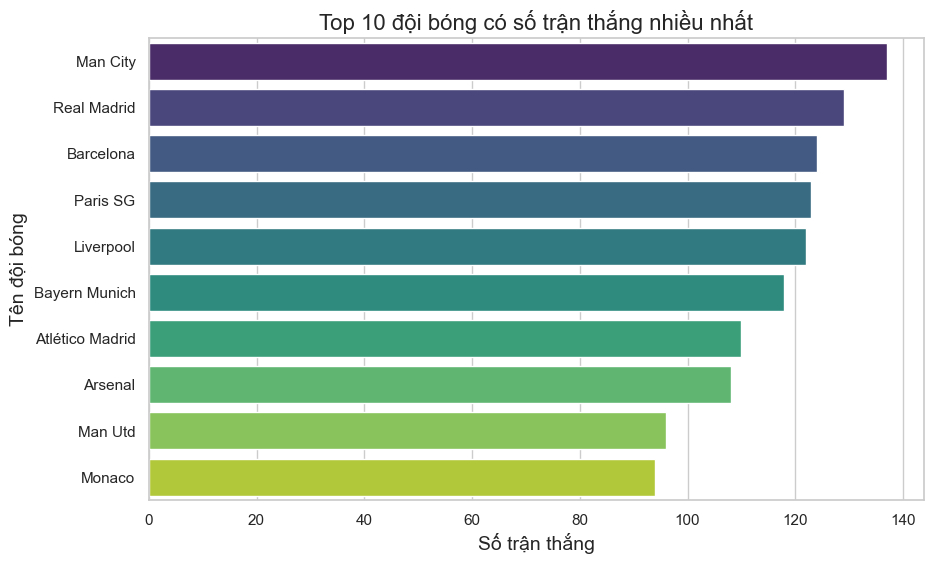

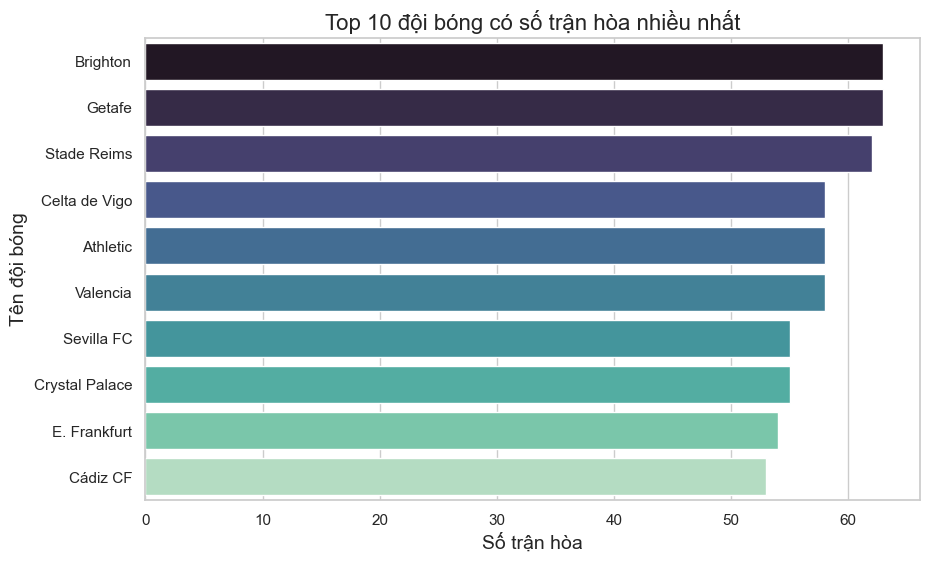

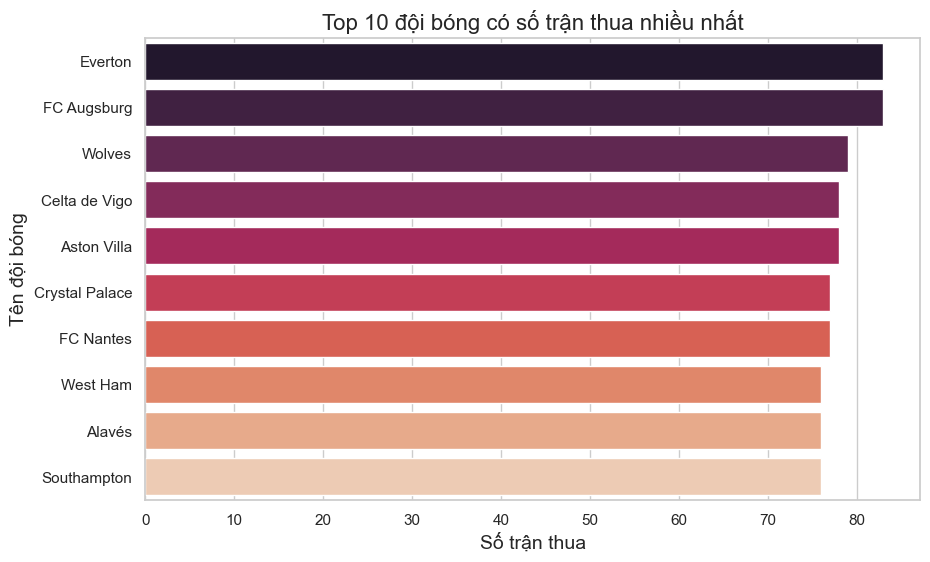

In [ ]:
# Trực quan tổng số trận thắng, hoà, thua
win_counts = df[df['Result'] == 'Win']['Team name'].value_counts().head(10)
draw_counts = df[df['Result'] == 'Draw']['Team name'].value_counts().head(10)
loss_counts = df[df['Result'] == 'Lose']['Team name'].value_counts().head(10)
win_df = win_counts.reset_index()
win_df.columns = ['Team name', 'Win Count']

draw_df = draw_counts.reset_index()
draw_df.columns = ['Team name', 'Draw Count']

loss_df = loss_counts.reset_index()
loss_df.columns = ['Team name', 'Loss Count']

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=win_df, y='Team name', x='Win Count', palette='viridis')
plt.title('Top 10 đội bóng có số trận thắng nhiều nhất', fontsize=16)
plt.xlabel('Số trận thắng', fontsize=14)
plt.ylabel('Tên đội bóng', fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=draw_df, y='Team name', x='Draw Count', palette='mako')
plt.title('Top 10 đội bóng có số trận hòa nhiều nhất', fontsize=16)
plt.xlabel('Số trận hòa', fontsize=14)
plt.ylabel('Tên đội bóng', fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=loss_df, y='Team name', x='Loss Count', palette='rocket')
plt.title('Top 10 đội bóng có số trận thua nhiều nhất', fontsize=16)
plt.xlabel('Số trận thua', fontsize=14)
plt.ylabel('Tên đội bóng', fontsize=14)
plt.show()

**Từ biểu đồ trực quan hoá các đội bóng có số trận thắng nhiều nhất, ta thấy được đây đều là những đội bóng mạnh, có bề dày thành tích và truyền thống ở châu Âu như là: Barcelona, Mancity, Arsenal, Atlético Madrid, Paris SG, Liverpool, Bayern Munich, Monaco, Man Utd, Real Madrid**  


**Những đội có số trận thua nhiều nhất là các đội thuộc dạng trung bình khá so với mặt bằng chung của châu Âu và đa số là các đội đang chơi ở giải Ngoại hạng Anh Premier Leguage: Everton, FC Augsburg, Wolves, Celta de Vigo, Aston Villa, Crystal Palace, FC Nantes, West Ham, Alavés, Southampton.**

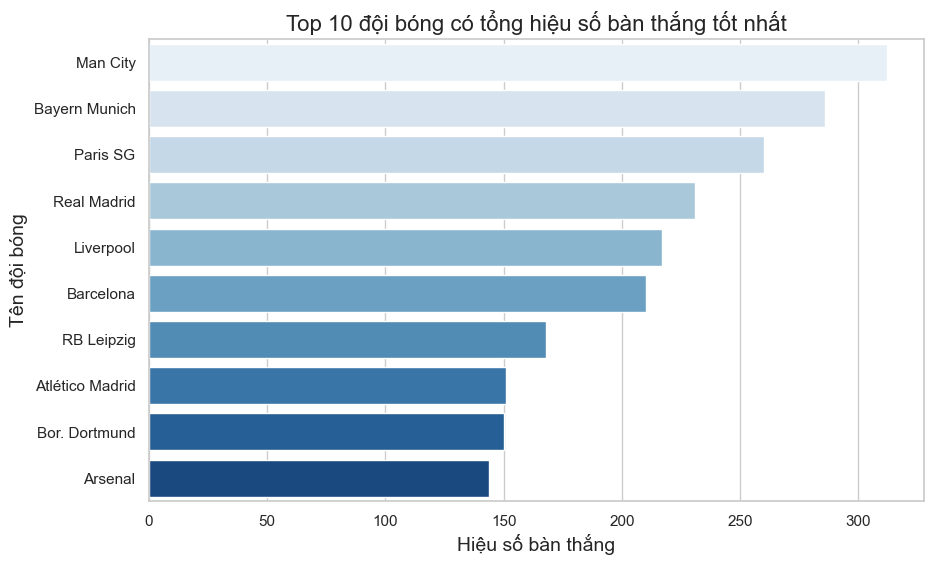

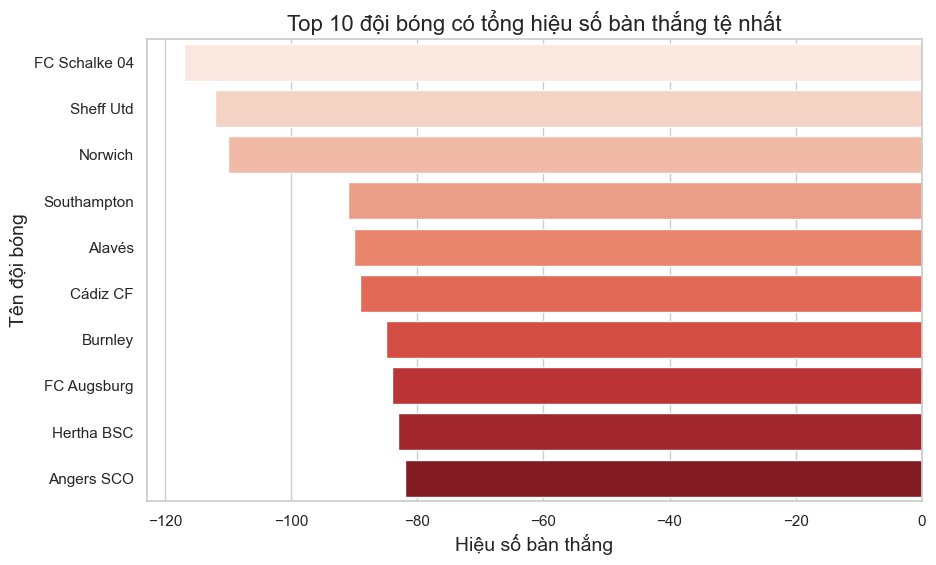

In [ ]:
# Tính tổng hiệu số bàn thắng cho mỗi đội
goal_difference = df.groupby('Team name')['Difference of score'].sum().reset_index()

# Lấy 10 đội có hiệu số bàn thắng tốt nhất
best_goal_difference = goal_difference.nlargest(10, 'Difference of score')

# Lấy 10 đội có hiệu số bàn thắng tệ nhất
worst_goal_difference = goal_difference.nsmallest(10, 'Difference of score')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=best_goal_difference, y='Team name', x='Difference of score', palette='Blues')
plt.title('Top 10 đội bóng có tổng hiệu số bàn thắng tốt nhất', fontsize=16)
plt.xlabel('Hiệu số bàn thắng', fontsize=14)
plt.ylabel('Tên đội bóng', fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=worst_goal_difference, y='Team name', x='Difference of score', palette='Reds')
plt.title('Top 10 đội bóng có tổng hiệu số bàn thắng tệ nhất', fontsize=16)
plt.xlabel('Hiệu số bàn thắng', fontsize=14)
plt.ylabel('Tên đội bóng', fontsize=14)
plt.show()

**Đội có tổng hiệu số bàn thắng bại tốt nhất là Man City ở giải bóng đá ngoại hạng Anh Premier Leaguage**   
**Đội có tổng hiệu số bàn thắng bại tệ nhết là FC Schalke 04 hiện tại đã xuống hạng và đang đá ở giải hạng 2 nước Đức**


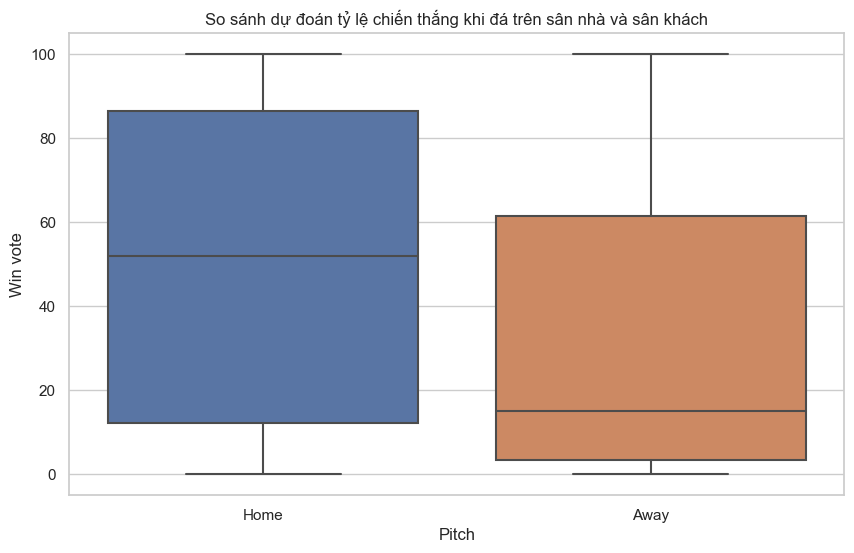

In [ ]:
# vẽ boxplot về phần trăm dự đoán thắng trận
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pitch', y='Win vote', data=df)
plt.title('So sánh dự đoán tỷ lệ chiến thắng khi đá trên sân nhà và sân khách')
plt.xlabel('Pitch')
plt.ylabel('Win vote')
plt.show()

**Đá trên sân nhà thường sẽ được dự đoán từ phần trăm thắng lớn hơn đá trên sân khách**

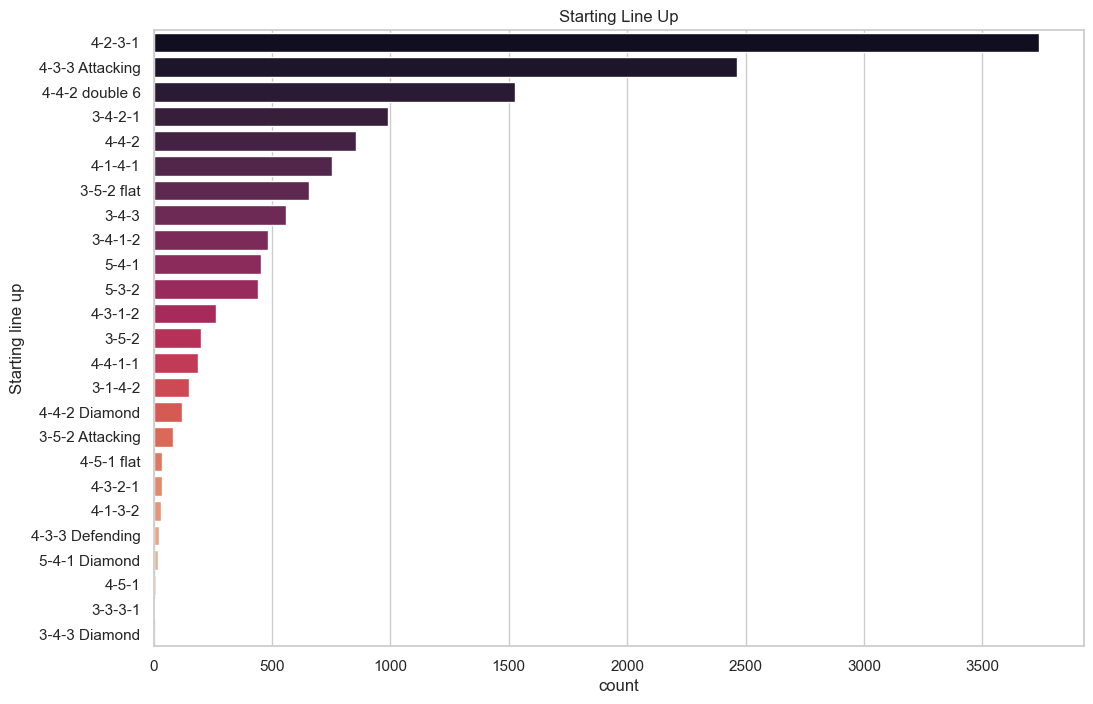

In [ ]:
# sơ đồ chiến thuật ra sân
plt.figure(figsize=(12, 8))
sns.countplot(y='Starting line up', data=df, order=df['Starting line up'].value_counts().index,  palette='rocket')
plt.title('Starting Line Up')
plt.show()

**Ta thấy được sơ đồ 4-2-3-1 là sơ đồ chiến thuật được ưa chuộng, và được các huẩn luyện viên lựa chọn nhiều nhât**
>Sơ đồ chiến thuật bóng đá 4-2-3-1 (hay còn gọi là sơ đồ hình kim cương) chính là lựa chọn của huấn luyện viên Jose Mourinho áp dụng cho Chealsea mùa giải 2014-2015. Trong lần trở lại dẫn dắt Chealsea này, ông đã ngay lập tức đạt được chức vô địch giải Ngoại Hạng Anh.  
Đội hình sơ đồ hình kim cương này là sự kết hợp sự tinh tế trong tấn công của sơ đồ 4-4-2 và tận dụng tối đa sức mạnh và kỹ thuật của hàng tiền vệ trong sơ đồ 4-3-3. Tức là nó vẫn mạnh trong tấn công nhưng vẫn duy trì được sự ổn định trong phòng thủ

**Chiến thuật  4-2-3-1 sử dụng nhân sự bao gồm: Bốn hậu vệ, hai tiền vệ phòng ngự, ba tiền vệ tấn công và một tiền đạo. Nó sử dụng sức mạnh sơ đồ kim cương ở vị trí tiền vệ, đồng thời khắc phục thành công điểm yếu là không có cầu thủ nào cần di chuyển quá rộng.**

In [ ]:
df['Win vote'].describe()

count    14076.000000
mean        40.987006
std         35.864294
min          0.000000
25%          6.000000
50%         29.700000
75%         78.200000
max        100.000000
Name: Win vote, dtype: float64

**Min:** 0%  
**Max:** 100%  
Cho thấy đây rất có thể là những trận đối đầu của những đội rất mạnh trong giải (top đầu) đấu với các đội rất yếu trong giải (top dưới)

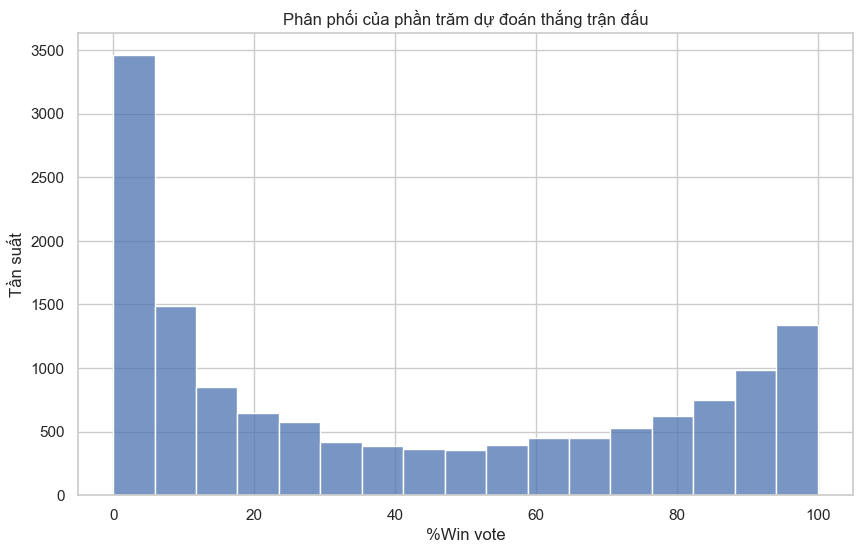

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Win vote', data=df)
plt.title('Phân phối của phần trăm dự đoán thắng trận đấu')
plt.xlabel('%Win vote')
plt.ylabel('Tần suất')
plt.show()

**Phân phối không đồng đều:** Biểu đồ phân phối của phần trăm dự đoán thắng trận đấu phân bố không đều.


**Phần trăm dự đoán thắng cao (gần 100%):**

* Các đội mạnh ở đầu bảng xếp hạng thường có phần trăm dự đoán thắng cao. Điều này phản ánh sự kỳ vọng lớn từ người hâm mộ và các chuyên gia về khả năng chiến thắng của họ trong các trận đấu.

* Đỉnh tần suất thứ hai trên biểu đồ, nằm ở phần trăm dự đoán thắng 100%, có thể đại diện cho các đội bóng mạnh. Các đội này thường có phong độ ổn định, lực lượng mạnh và thường xuyên thắng các trận đấu.

* Các đội mạnh không chỉ có nhiều dự đoán thắng cao (100%), mà còn có nhiều giá trị dự đoán nằm trong khoảng từ 70% đến 90%. Điều này cho thấy sự tự tin lớn từ phía người dự đoán về khả năng chiến thắng của các đội này.


**Phần trăm dự đoán thắng thấp (gần 0%):**

* Các đội yếu ở tốp dưới thường có phần trăm dự đoán thắng thấp. Điều này phản ánh sự thiếu tin tưởng từ người hâm mộ và các chuyên gia về khả năng chiến thắng của họ.

* Đỉnh tần suất cao nhất trên biểu đồ, nằm ở phần trăm dự đoán thắng 0%, có thể đại diện cho các đội bóng yếu. Các đội này thường có phong độ không ổn định, lực lượng yếu hơn và thường xuyên thua trong các trận đấu.

* Các đội yếu không chỉ có nhiều dự đoán thắng thấp (0%), mà còn có nhiều giá trị dự đoán nằm trong khoảng từ 0% đến 30%. Điều này cho thấy sự thiếu tin tưởng lớn từ phía người dự đoán về khả năng chiến thắng của các đội này.

## 3.2 Features Engineering


In [ ]:
# drop các thuộc tính không cần thiết
df = df.drop(columns=['Team name', 'Result'], axis = 0)

In [ ]:
# Chỉ lấy số liệu về tháng trong cột "Date" để biết trận đấu diễn ra trong thời gian nào của mùa giải
# Chuyển đổi cột "Date" sang định dạng datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Trích xuất phần tháng từ cột "Date"
df['Month'] = df['Date'].dt.month

# Xóa cột "Date"
df.drop(columns=['Date'], inplace=True)

In [ ]:
# features scaling
num = ['Win vote', 'Draw vote']
scaler = StandardScaler()
df[num] =scaler.fit_transform(df[num])

In [ ]:
# feature encoding
# encoded biến biến điều trị (T), T = 1: đá trên sân nhà, T = 0: đá trên sân khách
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Pitch'] = le.fit_transform(df['Pitch'])

In [ ]:
# chuyển đổi các categorical variables thành dummy variables
categ = ['Matchday order','Position','Position of opponent','Starting line up', 'Starting line up opponent', 'Referee', 'Month']

data = pd.concat([
    df.drop(columns=categ),
    pd.get_dummies(df[categ], columns=categ, drop_first=False) # chuyển đổi các categorical thành  dummies
], axis=1)

print(data.shape)

(14076, 281)


## 3.3 Thiết kế nghiên cứu

**Kiểu dữ liệu:** Dữ liệu quan sát được từ các trận đấu của 4 giải vô địch quốc gia: Đức, Anh, Pháp, Tây Ban Nha,trong vòng 5 năm trở lại đây. Đây không phải là thử nghiệm ngẫu nhiên. Số lượng mẫu quan sát được là: 14076 mẫu

**Quá trình phân bổ của nhóm hưởng lợi và nhóm đối chứng:**  quá trình nhận được treatment (đá trên sân nhà) là ngoại sinh, được phân chia từ đầu mùa giải và với tính chất của một giải bóng đá là: khi đội A gặp đội B lần đầu trong mùa giải lúc này nếu đội A được đá trên sân nhà thì lần sau gặp lại đội B, đội A sẽ phải đá trên sân khách (sân nhà của đội B)  

**Tình huống thử nghiệm:**  tình huống thử nghiệm không có hiện tượng lựa chọn mẫu (self selection into treatment). Không có thuộc tính nào không quan sát được tương quan đến việc điều trị (đá trên sân nhà hoặc sân khách) và kết quả. Nhưng dữ liệu được tách ra từ một trận đấu nên số lượng quan sát của hai nhóm sẽ bằng nhau cũng như hiệu số bàn thắng của hai quan sát được tách ra từ một trận đấu sẽ đối với nhau

**Mô hình:** từ những thông tin bên trên, nhóm quyết định sử dụng mô hình ghép cặp để xây dựng counterfactual cho nhóm hưởng lợi và nhóm đối chứng. Mục đích là đảm bảo điều kiện cân bằng giữa hai nhóm hưởng lợi và đối chứng. Sau đó ước lượng được tác động can thiệp trung bình bằng sự khác biệt về kết quả của hai nhóm:
>**ATT = E(Yi(1)|T=1) - E(Yi(0)|T=1) (Average Treatment Effect on the Treated)    
   ATC = E(Yi(1)|T=0) - E(Yi(0)|T=0)  (Average Treatment Effect on the Control)**
* Trong đó T là biến điều trị, Y là biến phụ thuộc và X là các biến điều kiện

**Cách thức:**  Sử dụng phương pháp so sánh bằng điểm xu hướng (propensity score matching-PSM) tìm nhóm hưởng lợi (treatment group) và nhóm đối chứng (control group) có tương đồng với nhau trong tổng thể mẫu dữ liệu bằng mô hình thống kê.

Trong nghiên cứu này: Điểm xu hướng là xác suất nhận được treatment của một quan sát. Là xác suất một đội được đá trên sân nhà

## 3.4 Implement PSM - Propensity score matching

### 3.4.1 Tính toán điểm xu hướng và kiểm tra vùng hỗ trợ chung

In [ ]:
# Ước tính propensity scores bằng LogisticRegression
def estimate_propensity_scores(df, X, T):
    model = LogisticRegression(max_iter=1000)
    model.fit(df[X], df[T])
    propensity_scores = model.predict_proba(df[X])[:, 1] # lấy xác xuất nhận được treatment là nhãn 1
    return propensity_scores

# Thực hiện matching giữa nhóm điều trị và nhóm kiểm soát dựa trên propensity score
# xây dựng counterfactual cho nhóm control
def match_control_on_propensity_scores(df, propensity_scores, T):
    df['propensity_score'] = propensity_scores  # Gán cột propensity_score vào dataframe ban đầu

    treated = df[df[T] == 1].copy()
    control = df[df[T] == 0].copy()

    matched_treated_indices = []

    for index, row in control.iterrows():
        if control.empty:
            break
        # Tìm đối tượng trong nhóm treated có propensity score gần nhất
        closest_index = np.argmin(np.abs(treated['propensity_score'] - row['propensity_score']))
        matched_treated_indices.append(treated.iloc[closest_index].name)

    matched_treated = df.loc[matched_treated_indices]
    matched_control = control

    return matched_treated, matched_control
# xây dựng counterfactual cho nhóm treated
def match_treated_on_propensity_scores(df, propensity_scores, T):
    df['propensity_score'] = propensity_scores  # Gán cột propensity_score vào dataframe ban đầu

    treated = df[df[T] == 1].copy()
    control = df[df[T] == 0].copy()

    matched_control_indices = []

    for index, row in treated.iterrows():
        if treated.empty:
            break
        # Tìm đối tượng trong nhóm control có propensity score gần nhất
        closest_index = np.argmin(np.abs(control['propensity_score'] - row['propensity_score']))
        matched_control_indices.append(control.iloc[closest_index].name)

    matched_control = df.loc[matched_control_indices]
    matched_treated = treated

    return matched_treated, matched_control


# Tính hiệu quả điều trị trung bình
def calculate_ate_from_matched(matched_treated, matched_control, Y):
   return np.mean(matched_treated[Y]) - np.mean(matched_control[Y])

In [ ]:
# Xác định các biến điều trị (T), biến phụ thuộc (Y), và các biến điều kiện (X).
T = 'Pitch'
Y = 'Difference of score'
X = data.columns.drop([T, Y])

In [ ]:
# Ước tính Propensity Scores
propensity_scores = estimate_propensity_scores(data, X, T)

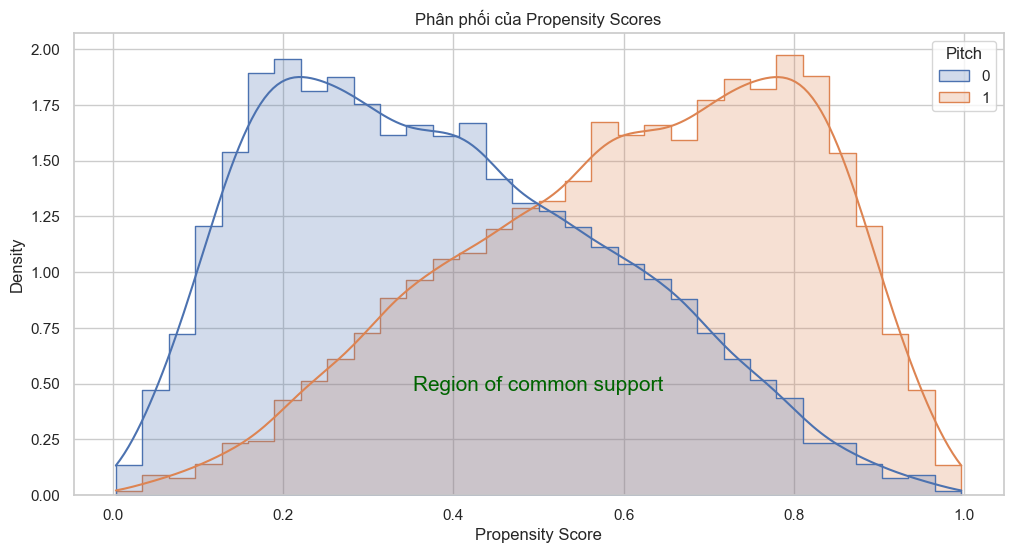

In [ ]:
# Biểu đồ phân phối propensity score của hai nhóm
propensity_score = pd.DataFrame(propensity_scores, columns=['propensity_score'])
logic = pd.concat([propensity_score, data[T]], axis=1)
sns.set(style="whitegrid")
# Tạo biểu đồ phân phối cho Propensity Scores
plt.figure(figsize=(12, 6))
sns.histplot(data=logic, x ='propensity_score', hue=T, element='step', stat='density', common_norm=False, kde=True)
plt.title('Phân phối của Propensity Scores')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.text(0.5, 0.47, 'Region of common support', fontsize=15, color='darkgreen', ha='center')
plt.show()

**Ta thấy được có vùng hỗ trợ chung, và vùng hỗ trợ chung lớn, bao phủ nên sẽ đảm bảo tìm được các cặp treated và control có propensity score gần giống nhau**

>**Nên có thể tiếp tục áp dụng PSM.**

### 3.4.2 Xây dựng counterfactual cho nhóm treated (được đá trên sân nhà)

In [ ]:
#Ghép các quan sát
matched_treated, matched_control = match_treated_on_propensity_scores(data, propensity_scores, T)

In [ ]:
# Kiểm tra xem với 7027 quan sát của nhóm treated sẽ ghép được bao nhiêu quan sát khác nhau ở nhóm control
unique_df = matched_control.drop_duplicates()
num_unique_rows = unique_df.shape[0]

print("Observations:", num_unique_rows)

Observations: 2956


#### Review the Quality of Matching

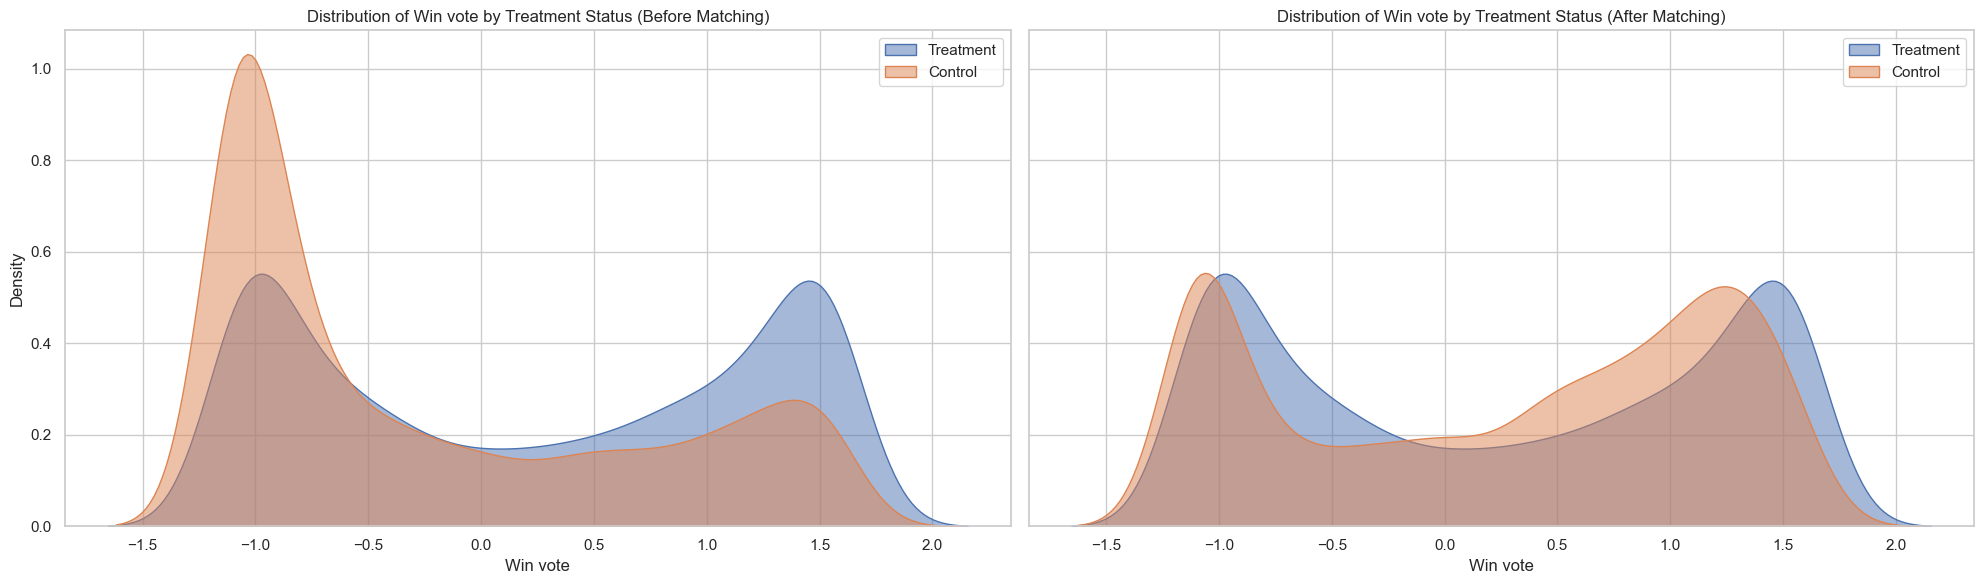

In [ ]:
numeric_vars = ['Win vote']

for var in numeric_vars:
    fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

    # Dữ liệu trước khi matching
    sns.kdeplot(data[data['Pitch'] == 1][var], label='Treatment', fill=True, alpha=0.5, ax=axes[0])
    sns.kdeplot(data[data['Pitch'] == 0][var], label='Control', fill=True, alpha=0.5, ax=axes[0])
    axes[0].set_title(f'Distribution of {var} by Treatment Status (Before Matching)')
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Density')
    axes[0].legend()

    # Dữ liệu sau khi matching
    sns.kdeplot(matched_treated[var], label='Treatment', fill=True, alpha=0.5, ax=axes[1])
    sns.kdeplot(matched_control[var], label='Control', fill=True, alpha=0.5, ax=axes[1])
    axes[1].set_title(f'Distribution of {var} by Treatment Status (After Matching)')
    axes[1].set_xlabel(var)
    axes[1].set_ylabel('Density')
    axes[1].legend()

    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

#### Kiểm định hypothesis ban đầu bằng ATT

In [ ]:
# Tính toán ATT
att = calculate_ate_from_matched(matched_treated, matched_control, Y)
print(f"ATT ước tính bằng PSM: {att}")

ATT ước tính bằng PSM: 0.2503552145495879


####  Dùng t-test để kiểm định xem có sự kết quả trung bình của hai nhóm có sự khác nhau hay không

In [ ]:
# dùng kiểm định t-test trên hai mẫu đã match
treatment_group = matched_treated[Y]
control_group = matched_control[Y]

mean_treatment = treatment_group.mean()
mean_control = control_group.mean()
std_treatment = treatment_group.std()
std_control = control_group.std()

print("Mean (Treatment):", mean_treatment)
print("Mean (Control):", mean_control)
print("Std (Treatment):", std_treatment)
print("Std (Control):", std_control)

# Thực hiện t-test hai mẫu
t_stat, p_value = stats.ttest_ind(treatment_group, control_group)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Kiểm định giả thuyết
alpha = 0.05  # Mức ý nghĩa 5%

if p_value < alpha:
    print("\nChúng ta bác bỏ giả thuyết H0-> Treatment có ảnh hưởng đến biến kết quả.")
else:
    print("\nChúng ta không thể bác bỏ giả thuyết H0-> Treatment không có ảnh hưởng đáng kể đến biến kết quả.")


Mean (Treatment): 0.2928388746803069
Mean (Control): 0.042483660130718956
Std (Treatment): 1.8535042637900259
Std (Control): 1.9083110072338545
T-statistic: 7.895010614407056
P-value: 3.1165173579744786e-15

Chúng ta bác bỏ giả thuyết H0-> Treatment có ảnh hưởng đến biến kết quả.


#### Tính khoảng tin cậy 95% cho ATT

In [ ]:
def bootstrap_psm_confidence_interval(data, X, T, Y, num_bootstrap_samples=1000, confidence_level=0.95, n_jobs=4,  match_func=match_treated_on_propensity_scores):
    np.random.seed(88)
    # Định nghĩa hàm bootstrap_sample để lấy mẫu bootstrap và tính ATT hoặc ATC
    def bootstrap_sample(i):
        # Lấy mẫu bootstrap từ dữ liệu gốc
        bootstrap_sample = data.sample(n=len(data), replace=True)
         # Ước lượng điểm xu hướng (propensity scores)
        propensity_scores = estimate_propensity_scores(bootstrap_sample, X, T)
        # Khớp cặp giữa nhóm điều trị và nhóm đối chứng dựa trên điểm xu hướng
        matched_treated, matched_control = match_func(bootstrap_sample, propensity_scores, T)
        # Tính ATT hoăc ATC từ các mẫu đã được khớp
        bootstrap_ate = calculate_ate_from_matched(matched_treated, matched_control, Y)
        return bootstrap_ate
    # Sử dụng tqdm_joblib để hiển thị thanh tiến trình cho quá trình song song
    with tqdm_joblib(desc="Bootstrap Progress", total=num_bootstrap_samples) as progress_bar:
        # Thực hiện các mẫu bootstrap song song
        results = Parallel(n_jobs=n_jobs)(delayed(bootstrap_sample)(i) for i in range(num_bootstrap_samples))

    alpha = 1 - confidence_level
    lower_percentile = (alpha / 2) * 100
    upper_percentile = (1 - alpha / 2) * 100
    confidence_interval = np.percentile(results, [lower_percentile, upper_percentile])

    return confidence_interval, results

In [ ]:
# tính khoảng tin cậy 95% cho ATT
confidence_interval, bootstrap_ates = bootstrap_psm_confidence_interval(data, X, T, Y,  match_func=match_treated_on_propensity_scores)
print("Khoảng tin cậy cho ATT:", confidence_interval)

Bootstrap Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Khoảng tin cậy cho ATT: [0.15812981 0.41321288]


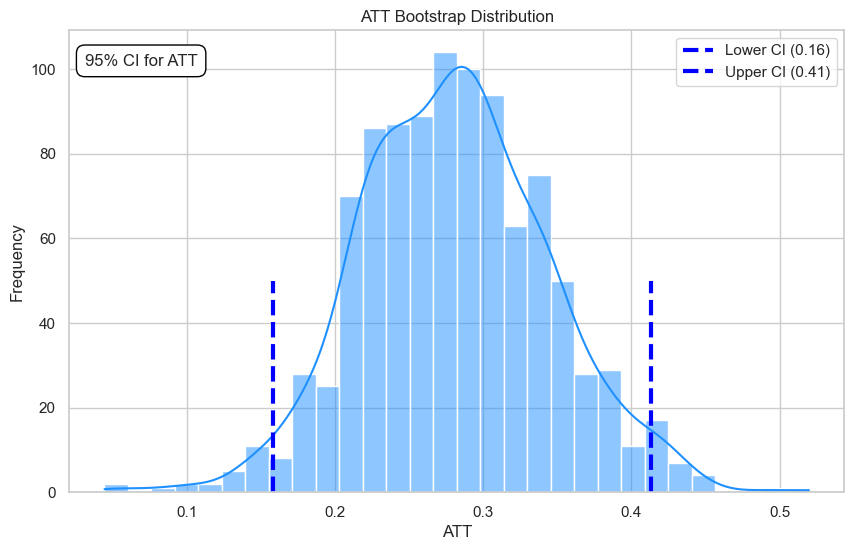

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_ates, bins=30, kde=True, color='dodgerblue')
plt.vlines(np.percentile(bootstrap_ates, 2.5), 0, 50, colors='blue', linestyles='--', label=f'Lower CI ({np.percentile(bootstrap_ates, 2.5):.2f})', linewidth=3)
plt.vlines(np.percentile(bootstrap_ates, 97.5), 0, 50, colors='blue', linestyles='--', label=f'Upper CI ({np.percentile(bootstrap_ates, 97.5):.2f})', linewidth=3)
plt.title('ATT Bootstrap Distribution')
plt.xlabel('ATT')
plt.ylabel('Frequency')
plt.legend()
plt.text(x=0.02, y=0.95, s='95% CI for ATT', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(x=0.02, y=0.95, s='95% CI for ATT', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

***Ta thấy được khoảng tin cậy không bao gồm giá trị 0. Nên có thể kết luận với 95% độ tin cậy rằng việc đội bóng được đá trên sân nhà sẽ ảnh hưởng tích cực đến hiệu số bàn thắng.***

### 3.4.3 Xây dựng counterfactual cho nhóm control (không được đá trên sân nhà)

In [ ]:
#Ghép các đối tượng
matched_treated, matched_control = match_control_on_propensity_scores(data, propensity_scores, T)

In [ ]:
# Kiểm tra xem với 7027 quan sát của nhóm control sẽ ghép được bao nhiêu quan sát khác nhau ở nhóm treated
unique_df = matched_treated.drop_duplicates()
num_unique_rows = unique_df.shape[0]

print("Observations:", num_unique_rows)

Observations: 2953


#### Review the Quality of Matching

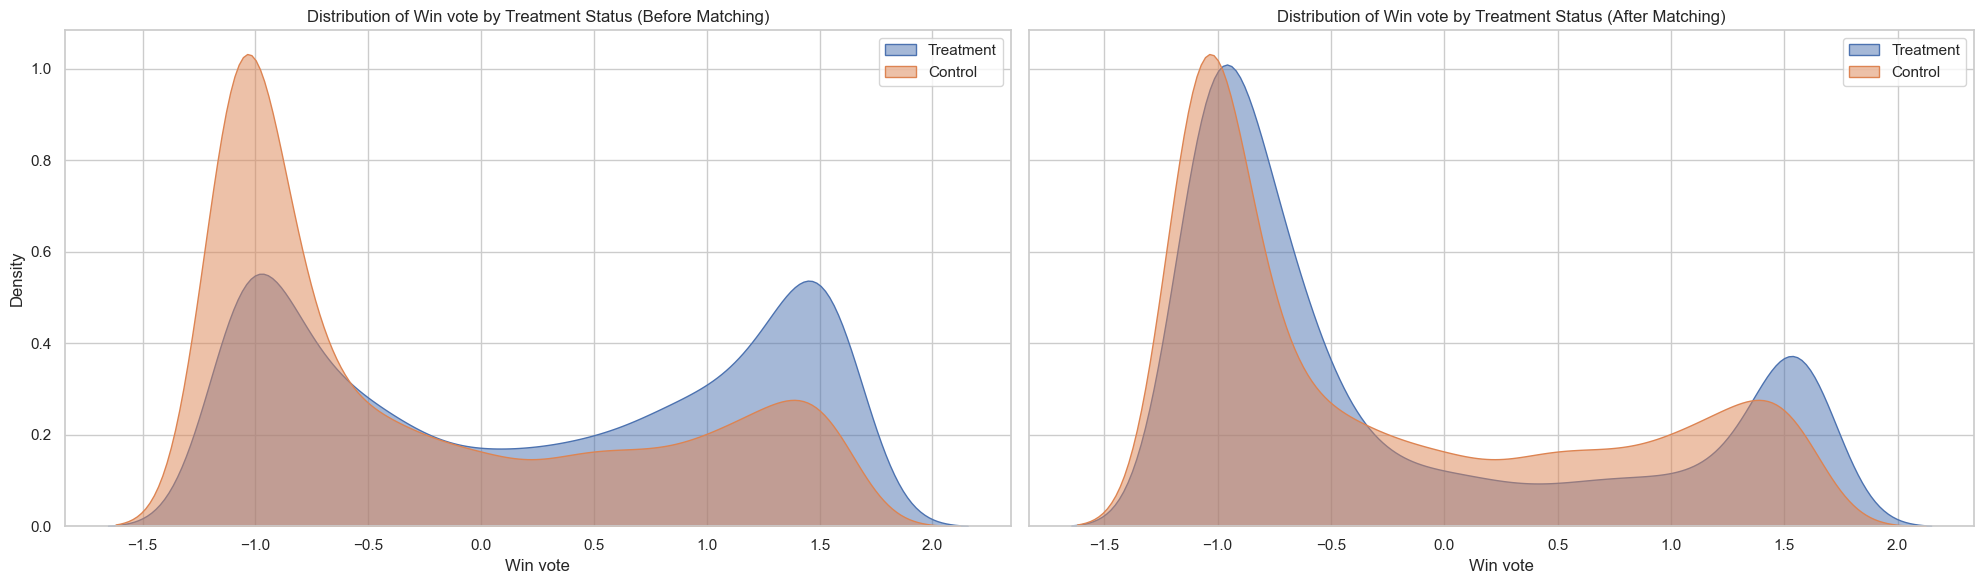

In [ ]:
numeric_vars = ['Win vote']

for var in numeric_vars:
    fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

    # Dữ liệu trước khi matching
    sns.kdeplot(data[data['Pitch'] == 1][var], label='Treatment', fill=True, alpha=0.5, ax=axes[0])
    sns.kdeplot(data[data['Pitch'] == 0][var], label='Control', fill=True, alpha=0.5, ax=axes[0])
    axes[0].set_title(f'Distribution of {var} by Treatment Status (Before Matching)')
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Density')
    axes[0].legend()

    # Dữ liệu sau khi matching
    sns.kdeplot(matched_treated[var], label='Treatment', fill=True, alpha=0.5, ax=axes[1])
    sns.kdeplot(matched_control[var], label='Control', fill=True, alpha=0.5, ax=axes[1])
    axes[1].set_title(f'Distribution of {var} by Treatment Status (After Matching)')
    axes[1].set_xlabel(var)
    axes[1].set_ylabel('Density')
    axes[1].legend()

    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

**Ta thấy được phân phối của các thuộc tính đã khớp nhau hơn sau khi matching, đã thoả được các điều kiện tiên quyết là sự cân bằng giữa hai nhóm nên sẽ tiến hành tính mức ảnh hưởng trung bình lên nhóm contorl (ATC) của việc nhận treatment (được đá trên sân nhà)**

#### Kiểm định hypothesis ban đầu bằng ATC

In [ ]:
# Tính toán ATC
atc = calculate_ate_from_matched(matched_treated, matched_control, Y)
print(f"ATC ước tính bằng PSM: {atc}")

ATC ước tính bằng PSM: 0.30605285592497866


####  Dùng t-test để kiểm định xem có sự kết quả trung bình của hai nhóm có sự khác nhau hay không

**Kiểm định giả thuyết:**  
**H0 : không có sự khác biệt về trung bình giữa hai nhóm**  
**H1 : có dự khác biệt về kết quả trung bình giữa hai nhóm  
Dựa vào giá trị p-value để quyết định chấp nhận hay bác bỏ H0**

In [ ]:
# dùng kiểm định t-test trên hai mẫu đã match
treatment_group = matched_treated[Y]
control_group = matched_control[Y]

mean_treatment = treatment_group.mean()
mean_control = control_group.mean()
std_treatment = treatment_group.std()
std_control = control_group.std()

print("Mean (Treatment):", mean_treatment)
print("Mean (Control):", mean_control)
print("Std (Treatment):", std_treatment)
print("Std (Control):", std_control)

# Thực hiện t-test hai mẫu
t_stat, p_value = stats.ttest_ind(treatment_group, control_group)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Kiểm định giả thuyết
alpha = 0.05  # Mức ý nghĩa 5%

if p_value < alpha:
    print("\nChúng ta bác bỏ giả thuyết H0 -> Treatment có ảnh hưởng đến biến kết quả.")
else:
    print("\nChúng ta không thể bác bỏ giả thuyết H0 -> Treatment không có ảnh hưởng đáng kể đến biến kết quả.")


Mean (Treatment): 0.013213981244671782
Mean (Control): -0.2928388746803069
Std (Treatment): 1.8910862875195324
Std (Control): 1.8535042637900259
T-statistic: 9.696385125007394
P-value: 3.6643744803798994e-22

Chúng ta bác bỏ giả thuyết H0 -> Treatment có ảnh hưởng đến biến kết quả.


>**Vậy yếu tố chơi trên sân nhà và sân khách có ảnh hưởng đến kết quả**

#### Kiểm tra xem treatment ảnh hưởng tích cực, hay tiêu cực đến kết quả

#### Tính khoảng tin cậy 95% cho ATC

In [ ]:
# tính khoảng tin cậy 95% cho ATC
confidence_interval, bootstrap_ates = bootstrap_psm_confidence_interval(data, X, T, Y,  match_func=match_control_on_propensity_scores)
print("Khoảng tin cậy cho ATC:", confidence_interval)

Bootstrap Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Khoảng tin cậy cho ATC: [0.14883965 0.41294451]


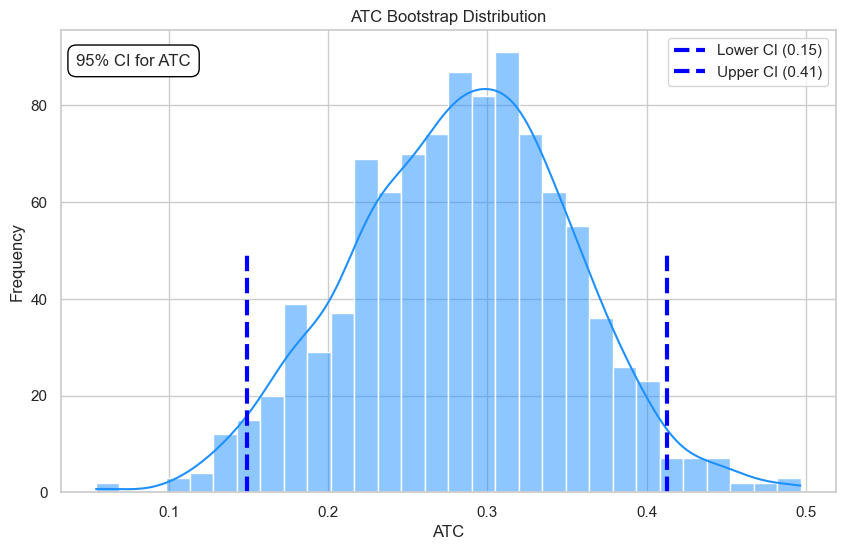

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_ates, bins=30, kde=True, color='dodgerblue')
plt.vlines(np.percentile(bootstrap_ates, 2.5), 0, 50, colors='blue', linestyles='--', label=f'Lower CI ({np.percentile(bootstrap_ates, 2.5):.2f})', linewidth=3)
plt.vlines(np.percentile(bootstrap_ates, 97.5), 0, 50, colors='blue', linestyles='--', label=f'Upper CI ({np.percentile(bootstrap_ates, 97.5):.2f})', linewidth=3)
plt.title('ATC Bootstrap Distribution')
plt.xlabel('ATC')
plt.ylabel('Frequency')
plt.legend()
plt.text(x=0.02, y=0.95, s='95% CI for ATC', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(x=0.02, y=0.95, s='95% CI for ATC', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

***Ta thấy được khoảng tin cậy không bao gồm giá trị 0. Nên có thể kết luận với 95% độ tin cậy rằng việc đội bóng được đá trên sân nhà sẽ ảnh hưởng tích cực đến hiệu số bàn thắng.***

## 3.5 Kết luận
**Khoảng tin cậy cho ATT:** cho thấy rằng hiệu ứng điều trị (việc được đá trên sân nhà) đối với những quan sát thực sự nhận được điều trị (trận đấu mà các đội bóng được đá trên sân nhà) là dương và nằm trong khoảng **[0.158, 0.413]** với độ tin cậy là 95%.

**Khoảng tn cậy cho ATC:** cũng chỉ ra rằng hiệu ứng điều trị (việc được đá trên sân nhà) đối với những đội bóng không được đá trên sân nhà là dương và nằm trong khoảng [0.149, 0.413] với độ tin cậy là 95%

***Với các khoảng tin cậy cho ATT và ATC đều nằm trên 0. Và ta quan sát thấy được cả hai phân phối của ATT và ATC đều nằm ở khoảng lớn hơn 0. Nên ta có thể kết luận rằng việc được đá trên sân nhà sẽ ảnh hưởng dương (tích cực) đến hiệu số bàn thắng của đội đó trong trận đấu đó***

# **4. Tổng kết**

## 4.1 Phương thức thực hiện

### Dùng Selenium để lấy dữ liệu thô từ web:

  - Chọn website: https://www.transfermarkt.com
  - Chọn quốc gia, tự động chọn giải đấu lớn nhất của quốc gia đó
  - Chọn số năm gần nhất, loại trừ mùa giải 24/25 hoặc 2024 vì chưa diễn ra xong.
  - Chuyển đến trang matchday overviews của giải đấu đó và lấy dữ liệu.
  - Chuyển sang trang matchday report của mỗi trận lấy thêm dữ liệu về line-ups của mỗi đội.
  - Ghi dữ liệu liên tục vào một file json.

### Dùng LLM để trích xuất dữ liệu có cấu trúc từ dữ liệu thô

* Chia làm 2 công đoạn:
  1. Trích xuất thông tin về một trận đấu (chứa cả đội nhà và đội khách)
  2. Trích xuất thông tin về trận đấu của mỗi đội từ thông tin về cả trận đấu ở trên
* **Công đoạn 1** : sử dụng framework **Lanchain** giúp tạo chain xử lí, gồm các bước:
  * Tạo lớp **Match** kế thừa lớp BaseModel của gói Pydantic_v1 để định nghĩa và giải thích các thông tin cần trích xuất từ 1 trận đấu.
  * Tạo đối tượng **parser** thuộc lớp PydanticOutputParser để dựa vào thông tin được trích xuất để trả về đối tượng dựa theo lớp Match.
  * Tạo **prompt template** để truyền input và các hướng dẫn trích xuất thông tin cho model.
  * Chọn 1 mô hình ngôn ngữ **llm**.
  * Tạo chain : **prompt template** | **llm** | **parser** .
  * Lưu thông tin về đối tượng lớp Match từ các **output** của **chain**
* **Công đoạn 2**:
  * Tạo đối tượng **TeamMatch** để lưu các thông tin từ đối tượng **Match**
  * Duyệt qua các đối tượng **Match** trích được từ công đoạn trước để trích xuất ra các đối tượng **TeamMatch**.
  * Lưu thông tin các đối tượng **TeamMatch** vào file CSV để sử dụng sau này.



### Cách thực hiện Causal Inference

#### **Các phương pháp được sử dụng trong phần Causal Inference:**

1.  **Phương pháp so sánh bằng điểm xu hướng (propensity score matching-PSM)**
tìm nhóm hưởng lợi (treatment group) và nhóm đối chứng (control group) có tương đồng với nhau trong tổng thể mẫu dữ liệu bằng mô hình thống kê.
xây dựng một chỉ số gọi là điểm xu hướng - propensity score.  
Điểm xu hướng là xác suất nhận được treatment của một quan sát. Là xác suất một đội được đá trên sân nhà.  
Sử dụng hồi quy Logistic để tính điểm xu hướng, sau đó quan sát có cùng điểm xu hướng gần nhau được ghép cặp và làm
đối chứng cho nhau với điều kiện là đảm bảo các điều kiện cân bằng cho hai nhóm


*  Phương pháp PSM áp dụng kết hợp của 2 phương pháp propensity score và matching
*   Các bước thực hiện propensity score matching:



>>*  1.Ước lượng mô hình xác xuất P(Di = 1|X) = f (Xi) bằng hồi
quy logit hay probit.
*   2.Ước lượng xác suất tham gia chương trình đối với mỗi quan sát i tại các giá trị Xi, gọi là điểm xu hướng (propensity score).
*   3.Ghép các nhóm hưởng lợi và đối chứng dựa trên giá trị
p(Di = 1|X) tương đồng. Có nhiều phương pháp ghép cặp
khác nhau.
*   4.Kiểm tra các điều kiện cân bằng. Dùng vùng hỗ trợ chung và phân phối của các biến điều kiện
* 5.Ước tính ATT và ATC từ các nhóm đối tượng được có thể ghép cặp.













#### **Các bước thực hiện phần Causal inference:**
- Thực hiện **Data Processing** để chuẩn bị đầy đủ các biến cho việc áp dụng causal inference: Mục 3.2 (chi tiết các bước làm)
- Thực hiện phương pháp **Propensity Score Matching (PSM)** ( Mục 3.4):
>- Ước tính propensity scores bằng LogisticRegression bằng hàm "**estimate_propensity_scores**"
>- Thực hiện matching giữa nhóm điều trị và nhóm kiểm soát dựa trên propensity score bằng 2 hàm "match_control_on_propensity_scores" (T=0) và "match_treated_on_propensity_scores" (T=1)
>-Thực hiện hàm tính toán trung bình điều trị giữa 2 nhóm control và treated (ATT và ATC) "calculate_ate_from_matched"
- Dựa vào giả thuyết ta xác định các biến : 'Pitch' là biến điều trị (T), 'Difference of score' biến phụ thuộc (Y) và các thuộc tính còn lại biến điều kiện (X)
>- Ta thực hiện tính Propensity Scores và vẽ đồ thị phân phối của Propensity Scores để nhìn thấy vùng hỗ trợ chung (vùng có ước lượng điểm xu hướng (hoặc xác suất
tham gia) của cả nhóm tham gia và nhóm kiểm soát). Vì vùng hỗ trợ chung lớn nên ta có thể áp dụng PSM để tìm nhóm treated và nhóm control
>- Ta sẽ thực hiện tính toán ATT, ATC và KTC dựa vào ATT,ATC thành 2 phần riêng biệt
>>- Ta sẽ xây dựng counterfactual cho nhóm treated (được đá trên sân nhà)
>>>- Ta sẽ thực hiện tính toán ATT và dùng t.test để kiểm tra xem 2 trung bình có khác nhau không. Dựa vào kết quả nhận được thì ta sẽ bác bỏ H0.
>>>-Sau đó, thực hiện tính khoảng tin cậy 95% cho ATT bằng phương pháp bootstrap. Vẽ đồ thị để cho ra Khoảng tin cậy.
>>- Ta sẽ xây dựng counterfactual cho nhóm control (không được đá trên sân nhà)
>>>- Ta sẽ thực hiện tính toán ATC và dùng t.test để kiểm tra xem 2 trung bình có khác nhau không. Dựa vào kết quả nhận được thì ta sẽ bác bỏ H0.
>>>-Sau đó, thực hiện tính khoảng tin cậy 95% cho ATC bằng phương pháp bootstrap. Vẽ đồ thị để cho ra Khoảng tin cậy.


## 4.2 Kết quả


- Dựa trên phân tích và các khoảng tin cậy đã tính toán, ta bác bỏ giả thuyểt H0: việc đá trên sân nhà không ảnh hưởng đến hiệu số bàn thắng của đội bóng trong trận đấu đó.

- **Kết luận:** Việc đá trên sân nhà có ảnh hưởng tích cực và có ý nghĩa thống kê đến hiệu số bàn thắng của đội bóng. Đội bóng đá trên sân nhà có khả năng tăng hiệu số bàn thắng từ 0.149 đến 0.413 bàn thắng.



## 4.3 Khó khăn gặp phải trong quá trình thực hiện đồ án

* Việc cào lượng lớn dữ liệu gây mất thời gian và yêu cầu chất lượng mạng phải luôn ổn định.
* Cấu trúc của trang web không cố định mà sẽ có sự thay đổi theo thời gian, dẫn đến việc phải thay update code mỗi khi web có sự thay đổi.
* Khi sử dụng LLM, phải điều chỉnh prompt dựa vào mô hình đang sử dụng sao cho phù hợp bởi tùy mô hình mà khả năng hiểu và sử lí yêu cầu của chúng khác nhau.
* Lúc trích xuất dữ liệu bằng LLM, chưa có một tool nào giúp ta kiểm tra, kiểm soát độ chính xác của kết quả đầu ra một cách tự động nên ta phải tự thực hiện phần này.
* Tốn nhiều thời gian để tìm hiểu và chọn mô hình kiểm định phù hợp với dữ liệu.